##  <center> PREDICCIÓN DE ENTALPÍA DE ATOMIZACIÓN <br><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="20%" height="15%" /><br>Andrea Carolina Reales Villalba -- Jesus Eduardo Ortiz Sandoval <BR>Punto 1 </center>


<div class=text-justify><b>
a) Construya un <font color=RED><b>Dataframe</b></font> con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas.</b></div>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.optimizers import SGD
from keras import regularizers
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

Using TensorFlow backend.


<div class=text-justify>
Se ha decidido en la primera celda inicializar todas las librerías que se van a utilizar en el notebook,  a diferencia de que en el enunciado se llamaban individualmente en cada celda, esto se diseño para poder tener un mayor control y solo con la ejecución de esta celda poder trabajar paralalelamente las celdas sin necesidad de correr todo el notebook.</div>

In [2]:
datos= pd.read_csv("C:/Users/Jesus/Documents/GitHub/roboBohr.csv")
datos.shape
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,8139.041805,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,...,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,33107.484300,-11.178969
std,4698.182820,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,...,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,23456.785147,3.659133
min,0.000000,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.245373
25%,4068.250000,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12298.250000,-13.475805
50%,8142.500000,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27731.500000,-10.835211
75%,12207.750000,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55020.750000,-8.623903
max,16272.000000,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,...,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,74980.000000,-0.789513


<div class=text-justify>
    Se puede analizar que en este <font color="red"><B>DATAFRAME</b></font> encontramos dos columnas con un comportamiento muy disperso respecto a las demás, <font color="blue"><b>unnamed:0</b> </font> y <font color="blue"><b>Pubchem_id</b></font> si llevaramos este dataframe a entrenamiento la dispersión en estas columnas muy seguramente causarían que nuestro modelo no convergiera, por este motivo es mejor eliminarlos del dataframe.</div>

In [3]:
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
datos.describe()

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,13.464842,...,0.000135,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,-11.178969
std,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,3.140732,...,0.002748,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,3.659133
min,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.245373
25%,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,12.489127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.475805
50%,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,13.648992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.835211
75%,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,13.801184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.623903
max,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,60.365756,...,0.062496,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,-0.789513


In [4]:
total=len(datos)
df_train=datos[:int(0.6*total)]                       
df_val=datos[int(0.6*total):int(0.85*total)]         
df_test=datos[int(0.85*total)::]                     
tra1=len(df_train)
val1=len(df_val)
test1=len(df_test)
print('Total muestras entrenamiento: %d'%(tra1))
print('Total muestras validación: %d'%(val1))
print('Total muestras testeo: %d'%(test1))


Total muestras entrenamiento: 9745
Total muestras validación: 4060
Total muestras testeo: 2437


<div class=text-justify>
Para realizar la predicción de la entalpía tenemos un dataset de 16242 muestras con 1276 características cada una, distribuidas con un 60% de los datos para el <j><b>training set</j></b>, 25% para  <j><b>validation set</j></b> y  15% para el <j><b>test set</j></b>.
</div>
    

<div class=text-justify><b> a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento</b></div>

In [5]:
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)
X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)

<div class=text-justify>
    Para poder tener un buen dataset, es necesario ejecutar sobre él algunos procedimientos que nos aseguren la calidad de la información, ya sea el preprocesamiento de los datos, observar el comportamiento de las muestras, análisis de posible ruido, tamaño de las muestras, etc; esto se hace para poder garantizar la eficiencia del algoritmo de aprendizaje y obtener los resultados deseados. Cuando en un dataset se tienen muestras con un valor nominal muy alto y/o gran dispersión entre las mismas, puede ser uno de los motivos para que el arreglo neuronal no pueda converger, incluso puede que se bloquee el entrenamiento o hasta la máquina donde se está ejecutando el algoritmo, Para evitar este tipo de daño la solución es normalizar el set de datos en una escala que se considere adeacuada <b>((0,1),(-1,1))</b>, teniendo claro que no se pierde nada de información y que la forma de onda de la señal es identica a la original.
    </div>

<div class=text-justify> <b>b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.</div>

In [21]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 234us/step - loss: 1.5160 - val_loss: 0.6598
Epoch 2/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.6154 - val_loss: 0.4925
Epoch 3/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.5100 - val_loss: 0.4267
Epoch 4/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.4474 - val_loss: 0.4328
Epoch 5/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.3921 - val_loss: 0.3718
Epoch 6/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.3401 - val_loss: 0.2764
Epoch 7/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.2925 - val_loss: 0.2365
Epoch 8/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.2506 - val_loss: 0.2257
Epoch 9/250
9745/9745 [==============================] - 2s 184us/step - loss: 0.2210 - val_loss: 0.2666 0.2
Epo

Epoch 78/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0292 - val_loss: 0.0489
Epoch 79/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0307 - val_loss: 0.0581
Epoch 80/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0306 - val_loss: 0.0504
Epoch 81/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0292 - val_loss: 0.0516
Epoch 82/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0292 - val_loss: 0.0558
Epoch 83/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0284 - val_loss: 0.0481
Epoch 84/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0286 - val_loss: 0.0489
Epoch 85/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0285 - val_loss: 0.0528
Epoch 86/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0278 - val_loss: 0.0472
Epoch 87/250
9745/9745 [======================

9745/9745 [==============================] - 2s 176us/step - loss: 0.0153 - val_loss: 0.0373
Epoch 231/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0150 - val_loss: 0.0417
Epoch 232/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0152 - val_loss: 0.0381
Epoch 233/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0151 - val_loss: 0.0372
Epoch 234/250
9745/9745 [==============================] - 2s 189us/step - loss: 0.0147 - val_loss: 0.0378
Epoch 235/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0154 - val_loss: 0.0371
Epoch 236/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0160 - val_loss: 0.0469
Epoch 237/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0150 - val_loss: 0.0377
Epoch 238/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0154 - val_loss: 0.0380
Epoch 239/250
9745/9745 [==========================

Text(0.5, 0, 'Epochs')

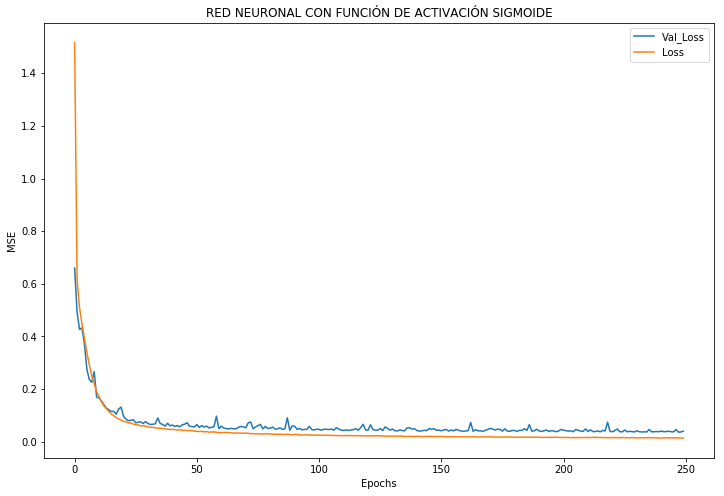

In [43]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('RED NEURONAL CON FUNCIÓN DE ACTIVACIÓN SIGMOIDE')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>Durante el entrenamiento no tuvimos problema, desde el primer intento mostró converger rápidamente a un valor de error pequeño, en la grafica observamos que la función de pérdida de validación que se grafica de color <font color=blue><b>AZUL</b></font> tiene muchas variaciones con poca magnitud que nos permiten deducir que aunque tiene buen comportamiento no muestra el mismo error de la señal <font color=orange><b> NARANJA</b></font> que representa la función de perdida en el entrenamiento.</div>

<div class=text-justify><b>c) Repita el paso anterior, utilizado ReLU como función de activación y compare con lo obtenido en b).</b></div>

In [29]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 319us/step - loss: 9.7783 - val_loss: 3.4933
Epoch 2/250
9745/9745 [==============================] - 3s 258us/step - loss: 2.0130 - val_loss: 1.8270
Epoch 3/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.7881 - val_loss: 1.8616
Epoch 4/250
9745/9745 [==============================] - 4s 381us/step - loss: 0.6961 - val_loss: 1.4928
Epoch 5/250
9745/9745 [==============================] - 4s 380us/step - loss: 0.7280 - val_loss: 1.2428
Epoch 6/250
9745/9745 [==============================] - 3s 314us/step - loss: 0.4989 - val_loss: 1.5811
Epoch 7/250
9745/9745 [==============================] - 3s 332us/step - loss: 0.4899 - val_loss: 1.0598
Epoch 8/250
9745/9745 [==============================] - 3s 301us/step - loss: 0.4602 - val_loss: 1.0211
Epoch 9/250
9745/9745 [==============================] - 3s 321us/step - loss: 0.3752 - val_loss: 1.0599
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0549 - val_loss: 0.3836
Epoch 79/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0643 - val_loss: 0.3871
Epoch 80/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0543 - val_loss: 0.4071
Epoch 81/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.0495 - val_loss: 0.3964
Epoch 82/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0529 - val_loss: 0.4166
Epoch 83/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0579 - val_loss: 0.4148
Epoch 84/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0524 - val_loss: 0.4312
Epoch 85/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.0500 - val_loss: 0.4504
Epoch 86/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0472 - val_loss: 0.3810
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 234us/step - loss: 0.0276 - val_loss: 0.4326
Epoch 156/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.0306 - val_loss: 0.4167
Epoch 157/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0285 - val_loss: 0.4238
Epoch 158/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0288 - val_loss: 0.4069
Epoch 159/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.0288 - val_loss: 0.4174
Epoch 160/250
9745/9745 [==============================] - 2s 234us/step - loss: 0.0292 - val_loss: 0.4308
Epoch 161/250
9745/9745 [==============================] - 2s 228us/step - loss: 0.0293 - val_loss: 0.4470
Epoch 162/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.0391 - val_loss: 0.4182
Epoch 163/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0500 - val_loss: 0.4648
Epoch 164/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

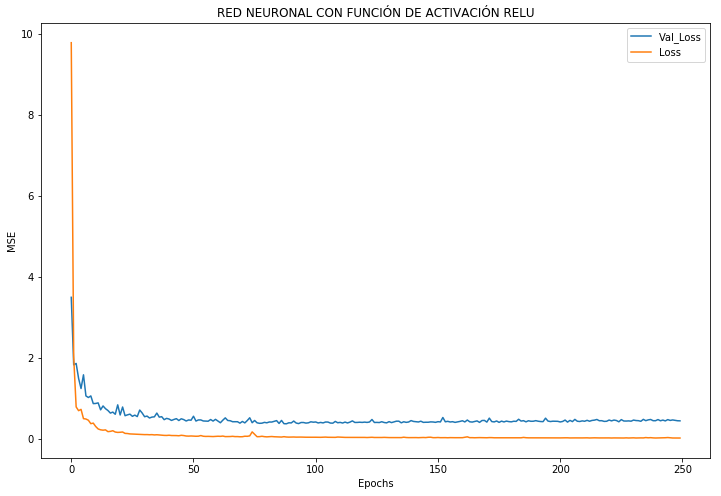

In [30]:
plt.figure(1,figsize=(12,8))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('RED NEURONAL CON FUNCIÓN DE ACTIVACIÓN RELU')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>El tiempo de ejecución de cada algoritmo es de 7 minutos con 24 segundos, en este caso, cuando mantuvimos el <b>"lr"</b> con el mismo valor del modelo anterior obteniamos en las funciones de pérdidas todos valores <font color=red><b>NaN</b></font>. Tuvimos que reajustar ese valor a 0.001 para obtener un resultado positivo. En este caso comparandolo con el modelo que tiene activación sigmoidal hay un valor de pérdida superior con respecto a la función de pérdida del  entrenamiento, se obtiene además las mismas variaciones en la forma de onda pero con magnitud superior, esto era señal de que en un punto determinado no encontraba los valores minimos globales y su error se incrementaba.</div>

<div class=text-justify><b>d) Repita b) y c) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.</b></div>

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 245us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 2/250
9745/9745 [==============================] - 2s 229us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 3/250
9745/9745 [==============================] - 2s 205us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 4/250
9745/9745 [==============================] - 2s 220us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 5/250
9745/9745 [==============================] - 2s 220us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 6/250
9745/9745 [==============================] - 2s 204us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 7/250
9745/9745 [==============================] - 2s 207us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 8/250
9745/9745 [==============================] - 2s 202us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 9/250
9745/9745 [==============================] - 2s 207us/step - loss: 1

Epoch 75/250
9745/9745 [==============================] - 2s 212us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 76/250
9745/9745 [==============================] - 2s 204us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 77/250
9745/9745 [==============================] - 2s 208us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 78/250
9745/9745 [==============================] - 2s 208us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 79/250
9745/9745 [==============================] - 2s 200us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 80/250
9745/9745 [==============================] - 2s 207us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 81/250
9745/9745 [==============================] - 2s 215us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 82/250
9745/9745 [==============================] - 2s 224us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 83/250
9745/9745 [==============================] - 2s 223us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 84/2

Epoch 149/250
9745/9745 [==============================] - 2s 212us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 150/250
9745/9745 [==============================] - 2s 204us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 151/250
9745/9745 [==============================] - 2s 212us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 152/250
9745/9745 [==============================] - 2s 202us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 153/250
9745/9745 [==============================] - 2s 200us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 154/250
9745/9745 [==============================] - 2s 220us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 155/250
9745/9745 [==============================] - 2s 218us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 156/250
9745/9745 [==============================] - 2s 208us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 157/250
9745/9745 [==============================] - 2s 207us/step - loss: 132.6967 - val_loss: 152.2549
E

Epoch 223/250
9745/9745 [==============================] - 2s 197us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 224/250
9745/9745 [==============================] - 2s 200us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 225/250
9745/9745 [==============================] - 2s 192us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 226/250
9745/9745 [==============================] - 2s 220us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 227/250
9745/9745 [==============================] - 2s 224us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 228/250
9745/9745 [==============================] - 2s 204us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 229/250
9745/9745 [==============================] - 2s 208us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 230/250
9745/9745 [==============================] - 2s 204us/step - loss: 132.6967 - val_loss: 152.2549
Epoch 231/250
9745/9745 [==============================] - 2s 218us/step - loss: 132.6967 - val_loss: 152.2549
E

9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 133/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 134/250
9745/9745 [==============================] - 2s 200us/step - loss: nan - val_loss: nan
Epoch 135/250
9745/9745 [==============================] - 2s 192us/step - loss: nan - val_loss: nan
Epoch 136/250
9745/9745 [==============================] - 2s 197us/step - loss: nan - val_loss: nan
Epoch 137/250
9745/9745 [==============================] - 2s 197us/step - loss: nan - val_loss: nan
Epoch 138/250
9745/9745 [==============================] - 2s 194us/step - loss: nan - val_loss: nan
Epoch 139/250
9745/9745 [==============================] - 2s 197us/step - loss: nan - val_loss: nan
Epoch 140/250
9745/9745 [==============================] - 2s 191us/step - loss: nan - val_loss: nan
Epoch 141/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoc

9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 45/250
9745/9745 [==============================] - 2s 197us/step - loss: nan - val_loss: nan
Epoch 46/250
9745/9745 [==============================] - 2s 200us/step - loss: nan - val_loss: nan
Epoch 47/250
9745/9745 [==============================] - 2s 200us/step - loss: nan - val_loss: nan
Epoch 48/250
9745/9745 [==============================] - 2s 194us/step - loss: nan - val_loss: nan
Epoch 49/250
9745/9745 [==============================] - 2s 200us/step - loss: nan - val_loss: nan
Epoch 50/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 51/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 52/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 53/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 54/250


Epoch 126/250
9745/9745 [==============================] - 2s 197us/step - loss: nan - val_loss: nan
Epoch 127/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 128/250
9745/9745 [==============================] - 2s 199us/step - loss: nan - val_loss: nan
Epoch 129/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoch 130/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 131/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoch 132/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 133/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 134/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoch 135/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_

9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 208/250
9745/9745 [==============================] - 2s 231us/step - loss: nan - val_loss: nan
Epoch 209/250
9745/9745 [==============================] - 2s 210us/step - loss: nan - val_loss: nan
Epoch 210/250
9745/9745 [==============================] - 2s 226us/step - loss: nan - val_loss: nan
Epoch 211/250
9745/9745 [==============================] - 2s 202us/step - loss: nan - val_loss: nan
Epoch 212/250
9745/9745 [==============================] - 2s 204us/step - loss: nan - val_loss: nan
Epoch 213/250
9745/9745 [==============================] - 2s 210us/step - loss: nan - val_loss: nan
Epoch 214/250
9745/9745 [==============================] - 2s 200us/step - loss: nan - val_loss: nan
Epoch 215/250
9745/9745 [==============================] - 2s 196us/step - loss: nan - val_loss: nan
Epoch 216/250
9745/9745 [==============================] - 2s 216us/step - loss: nan - val_loss: nan
Epoc

Epoch 120/250
9745/9745 [==============================] - 2s 215us/step - loss: nan - val_loss: nan
Epoch 121/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 122/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 123/250
9745/9745 [==============================] - 2s 212us/step - loss: nan - val_loss: nan
Epoch 124/250
9745/9745 [==============================] - 2s 231us/step - loss: nan - val_loss: nan
Epoch 125/250
9745/9745 [==============================] - 2s 220us/step - loss: nan - val_loss: nan
Epoch 126/250
9745/9745 [==============================] - 2s 231us/step - loss: nan - val_loss: nan
Epoch 127/250
9745/9745 [==============================] - 2s 215us/step - loss: nan - val_loss: nan
Epoch 128/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 129/250
9745/9745 [==============================] - 2s 210us/step - loss: nan - val_

9745/9745 [==============================] - 2s 218us/step - loss: nan - val_loss: nan
Epoch 202/250
9745/9745 [==============================] - 2s 220us/step - loss: nan - val_loss: nan
Epoch 203/250
9745/9745 [==============================] - 2s 205us/step - loss: nan - val_loss: nan
Epoch 204/250
9745/9745 [==============================] - 2s 210us/step - loss: nan - val_loss: nan
Epoch 205/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 206/250
9745/9745 [==============================] - 2s 205us/step - loss: nan - val_loss: nan
Epoch 207/250
9745/9745 [==============================] - 2s 212us/step - loss: nan - val_loss: nan
Epoch 208/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 209/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 210/250
9745/9745 [==============================] - 2s 210us/step - loss: nan - val_loss: nan
Epoc

Epoch 114/250
9745/9745 [==============================] - 2s 250us/step - loss: nan - val_loss: nan
Epoch 115/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 116/250
9745/9745 [==============================] - 2s 233us/step - loss: nan - val_loss: nan
Epoch 117/250
9745/9745 [==============================] - 2s 236us/step - loss: nan - val_loss: nan
Epoch 118/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 119/250
9745/9745 [==============================] - 2s 253us/step - loss: nan - val_loss: nan
Epoch 120/250
9745/9745 [==============================] - 2s 247us/step - loss: nan - val_loss: nan
Epoch 121/250
9745/9745 [==============================] - 3s 273us/step - loss: nan - val_loss: nan
Epoch 122/250
9745/9745 [==============================] - 3s 260us/step - loss: nan - val_loss: nan
Epoch 123/250
9745/9745 [==============================] - 2s 244us/step - loss: nan - val_

9745/9745 [==============================] - 2s 224us/step - loss: nan - val_loss: nan
Epoch 196/250
9745/9745 [==============================] - 2s 249us/step - loss: nan - val_loss: nan
Epoch 197/250
9745/9745 [==============================] - 2s 228us/step - loss: nan - val_loss: nan
Epoch 198/250
9745/9745 [==============================] - 2s 229us/step - loss: nan - val_loss: nan
Epoch 199/250
9745/9745 [==============================] - 2s 231us/step - loss: nan - val_loss: nan
Epoch 200/250
9745/9745 [==============================] - 3s 263us/step - loss: nan - val_loss: nan
Epoch 201/250
9745/9745 [==============================] - 2s 231us/step - loss: nan - val_loss: nan
Epoch 202/250
9745/9745 [==============================] - 2s 226us/step - loss: nan - val_loss: nan
Epoch 203/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 204/250
9745/9745 [==============================] - 3s 263us/step - loss: nan - val_loss: nan
Epoc

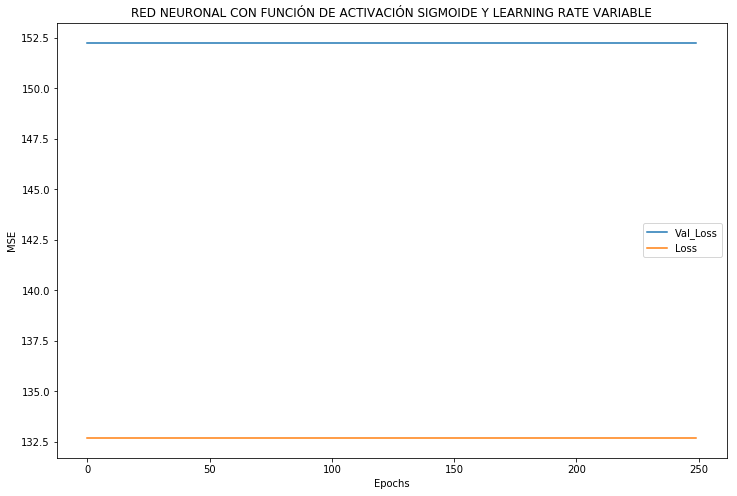

In [12]:
n_lr = 5
lear_rate = np.linspace(0,1,n_lr)
for i in range (0,len(lear_rate)):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=lear_rate[i]),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
    plt.figure(1,figsize=(12,8))
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.legend(('Val_Loss', 'Loss' ))
    plt.title('RED NEURONAL CON FUNCIÓN DE ACTIVACIÓN SIGMOIDE Y LEARNING RATE VARIABLE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')


<div class=text-justify>
    Cuando aumentamos el <b>lear rate</b> observamos que el algoritma no logra converger obteniendo como  resultado todos los valores de perdida NaN, esto nos indica que hay un punto en el que <b> learning rate</b> vuelve inutil el algoritmo, por que en lugar de generar mejor aprendizaje, encuentra valores imposibles de computar.
 </div>

In [9]:
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
for i in range (0,len(lear_rate)):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=lear_rate[i]),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
    plt.figure(1,figsize=(12,8))
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.legend(('Val_Loss', 'Loss' ))
    plt.title('RED NEURONAL CON FUNCIÓN DE ACTIVACIÓN RELU Y LEARNING RATE VARIABLE')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 278us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 2/250
9745/9745 [==============================] - 2s 214us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 3/250
9745/9745 [==============================] - 2s 222us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 4/250
9745/9745 [==============================] - 2s 209us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 5/250
9745/9745 [==============================] - 2s 203us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 6/250
9745/9745 [==============================] - 2s 209us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 7/250
9745/9745 [==============================] - 2s 204us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 8/250
9745/9745 [==============================] - 2s 206us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 9/250
9745/9745 [==============================] - 2s 207us/step - loss: 1

9745/9745 [==============================] - 2s 206us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 150/250
9745/9745 [==============================] - 2s 207us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 151/250
9745/9745 [==============================] - 2s 202us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 152/250
9745/9745 [==============================] - 2s 209us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 153/250
9745/9745 [==============================] - 2s 204us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 154/250
9745/9745 [==============================] - 2s 204us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 155/250
9745/9745 [==============================] - 2s 210us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 156/250
9745/9745 [==============================] - 2s 206us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 157/250
9745/9745 [==============================] - 2s 215us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 158/250
9

Epoch 223/250
9745/9745 [==============================] - 2s 208us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 224/250
9745/9745 [==============================] - 2s 203us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 225/250
9745/9745 [==============================] - 2s 205us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 226/250
9745/9745 [==============================] - 2s 204us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 227/250
9745/9745 [==============================] - 2s 206us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 228/250
9745/9745 [==============================] - 2s 210us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 229/250
9745/9745 [==============================] - 2s 202us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 230/250
9745/9745 [==============================] - 2s 208us/step - loss: 137.8833 - val_loss: 160.3649
Epoch 231/250
9745/9745 [==============================] - 2s 205us/step - loss: 137.8833 - val_loss: 160.3649
E

NameError: name 'history' is not defined

<div class=text-justify>En este caso como se habia observado en el punto anterior con <b> learning rate </b> altos, el algoritmo no logra hacer los cómputos obteniedo como resultado en las funciones de pérdida valores NaN, cuando el ya comienza a converger se encuentran errores muy significativos, en este caso particular se tiene los mejores resultados con un <b> learning rate </b> muy pequeño.</div>

<div class=text-justify> <b>e) Entrene los modelos considerados en b) y c) usando progressive decay. Compare y comente.</b></div>

In [57]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd1 = SGD(lr=0.01, decay=1e-6)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=sgd1,loss='mean_squared_error')
history_decay_sig = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd2 = SGD(lr=0.001, decay=1e-6)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=sgd2,loss='mean_squared_error')
history_decay_relu = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 200us/step - loss: 1.5457 - val_loss: 0.8011
Epoch 2/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.6031 - val_loss: 0.4205
Epoch 3/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.4850 - val_loss: 0.3598
Epoch 4/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.4090 - val_loss: 0.4440
Epoch 5/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.3421 - val_loss: 0.2906
Epoch 6/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.3003 - val_loss: 0.2929
Epoch 7/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.2619 - val_loss: 0.2310
Epoch 8/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.2341 - val_loss: 0.3604
Epoch 9/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.2074 - val_loss: 0.2275
Epoch 1

Epoch 154/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0198 - val_loss: 0.0437
Epoch 155/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0199 - val_loss: 0.0370
Epoch 156/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0202 - val_loss: 0.0559
Epoch 157/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0199 - val_loss: 0.0376
Epoch 158/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0198 - val_loss: 0.0393
Epoch 159/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0199 - val_loss: 0.0406
Epoch 160/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0192 - val_loss: 0.0438
Epoch 161/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0197 - val_loss: 0.0413
Epoch 162/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0203 - val_loss: 0.0365
Epoch 163/250
9745/9745 [============

9745/9745 [==============================] - 2s 178us/step - loss: 0.0727 - val_loss: 0.6424
Epoch 57/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0902 - val_loss: 0.9023
Epoch 58/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0810 - val_loss: 0.6382
Epoch 59/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0681 - val_loss: 0.6534
Epoch 60/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0639 - val_loss: 0.6367
Epoch 61/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0645 - val_loss: 0.6502
Epoch 62/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0642 - val_loss: 0.6401
Epoch 63/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.0602 - val_loss: 0.6188
Epoch 64/250
9745/9745 [==============================] - 2s 178us/step - loss: 0.0596 - val_loss: 0.6373
Epoch 65/250
9745/9745 [==============================] - 2

9745/9745 [==============================] - 2s 184us/step - loss: 0.0340 - val_loss: 0.6048
Epoch 134/250
9745/9745 [==============================] - 2s 186us/step - loss: 0.0327 - val_loss: 0.5900
Epoch 135/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0330 - val_loss: 0.5969
Epoch 136/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0329 - val_loss: 0.5861
Epoch 137/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0315 - val_loss: 0.5912
Epoch 138/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0318 - val_loss: 0.6123
Epoch 139/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0300 - val_loss: 0.5903
Epoch 140/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.0385 - val_loss: 0.5855
Epoch 141/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0356 - val_loss: 0.6269
Epoch 142/250
9745/9745 [==========================

Text(0.5, 0, 'Epochs')

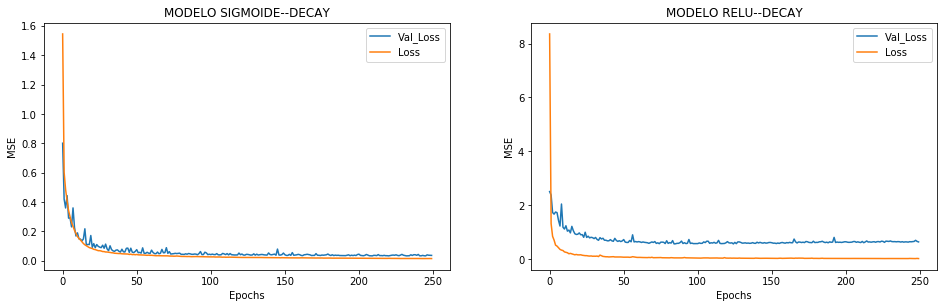

In [90]:
plt.figure(2,figsize=(16,10))
plt.subplot(2, 2, 1)
plt.plot(history_decay_sig.history['val_loss'])
plt.plot(history_decay_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--DECAY')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(2, 2, 2)
plt.plot(history_decay_relu.history['val_loss'])
plt.plot(history_decay_relu.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU--DECAY')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify> En el modelo <b>Sigmoidal</b> al principio de la forma de onda de la función de pérdida se puede observar variaciones muy altas que pueden ser que no le permitan al modelo converger con menor número de iteraciones, la escala de error es bastante aceptable comparada con el modelo <b>ReLU</b> que aunque no presenta el comportamiento variante tan marcado si posee un error bastante significativo, casi 10 veces mas alto.</div>

<div class=text-justify><b>f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del batch. Comente.</b>

In [7]:
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history_batch10_sig = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history_batch90_sig = model.fit(X_train_scaled,y_train,batch_size=90,epochs=250,validation_data=(X_val_scaled, y_val))

n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history_batch50_rel = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.001),loss='mean_squared_error')
history_batch90_rel = model.fit(X_train_scaled,y_train,batch_size=90,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 237us/step - loss: 1.7701 - val_loss: 0.6504
Epoch 2/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.6718 - val_loss: 0.4983
Epoch 3/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.5759 - val_loss: 0.4800
Epoch 4/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.5234 - val_loss: 0.4244
Epoch 5/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.4719 - val_loss: 0.3849
Epoch 6/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.4302 - val_loss: 0.3406
Epoch 7/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.3907 - val_loss: 0.3396
Epoch 8/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.3562 - val_loss: 0.2937
Epoch 9/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.3264 - val_loss: 0.2768
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 3s 277us/step - loss: 0.0384 - val_loss: 0.0547
Epoch 79/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.0380 - val_loss: 0.0532
Epoch 80/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0368 - val_loss: 0.0531
Epoch 81/250
9745/9745 [==============================] - 3s 272us/step - loss: 0.0374 - val_loss: 0.0530
Epoch 82/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.0362 - val_loss: 0.0548
Epoch 83/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.0375 - val_loss: 0.0648
Epoch 84/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.0368 - val_loss: 0.0552
Epoch 85/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.0365 - val_loss: 0.0539
Epoch 86/250
9745/9745 [==============================] - 2s 185us/step - loss: 0.0366 - val_loss: 0.0516
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.0245 - val_loss: 0.0447
Epoch 156/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.0235 - val_loss: 0.0460
Epoch 157/250
9745/9745 [==============================] - 2s 237us/step - loss: 0.0240 - val_loss: 0.0463
Epoch 158/250
9745/9745 [==============================] - 2s 227us/step - loss: 0.0250 - val_loss: 0.0456
Epoch 159/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.0242 - val_loss: 0.0462
Epoch 160/250
9745/9745 [==============================] - 2s 229us/step - loss: 0.0231 - val_loss: 0.0429
Epoch 161/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.0237 - val_loss: 0.0469
Epoch 162/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0241 - val_loss: 0.0482
Epoch 163/250
9745/9745 [==============================] - 2s 188us/step - loss: 0.0242 - val_loss: 0.0458
Epoch 164/250
9745/9745 [============

Epoch 58/250
9745/9745 [==============================] - 1s 132us/step - loss: 0.0697 - val_loss: 0.0964
Epoch 59/250
9745/9745 [==============================] - 1s 137us/step - loss: 0.0692 - val_loss: 0.0954
Epoch 60/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.0678 - val_loss: 0.0999
Epoch 61/250
9745/9745 [==============================] - 1s 139us/step - loss: 0.0669 - val_loss: 0.0871
Epoch 62/250
9745/9745 [==============================] - 1s 135us/step - loss: 0.0662 - val_loss: 0.0823
Epoch 63/250
9745/9745 [==============================] - 1s 133us/step - loss: 0.0644 - val_loss: 0.0800
Epoch 64/250
9745/9745 [==============================] - 1s 138us/step - loss: 0.0640 - val_loss: 0.0937
Epoch 65/250
9745/9745 [==============================] - 1s 130us/step - loss: 0.0630 - val_loss: 0.0785
Epoch 66/250
9745/9745 [==============================] - 1s 140us/step - loss: 0.0605 - val_loss: 0.0805
Epoch 67/250
9745/9745 [======================

Epoch 135/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0338 - val_loss: 0.0527
Epoch 136/250
9745/9745 [==============================] - 1s 123us/step - loss: 0.0341 - val_loss: 0.0551
Epoch 137/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0330 - val_loss: 0.0613
Epoch 138/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0340 - val_loss: 0.0594
Epoch 139/250
9745/9745 [==============================] - 1s 124us/step - loss: 0.0335 - val_loss: 0.0534
Epoch 140/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0347 - val_loss: 0.0509
Epoch 141/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.0330 - val_loss: 0.0489
Epoch 142/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0328 - val_loss: 0.0523
Epoch 143/250
9745/9745 [==============================] - 1s 128us/step - loss: 0.0341 - val_loss: 0.0525
Epoch 144/250
9745/9745 [============

9745/9745 [==============================] - 2s 170us/step - loss: 0.1448 - val_loss: 0.6661
Epoch 38/250
9745/9745 [==============================] - 2s 160us/step - loss: 0.1308 - val_loss: 0.6551
Epoch 39/250
9745/9745 [==============================] - 2s 168us/step - loss: 0.1208 - val_loss: 0.6741
Epoch 40/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1125 - val_loss: 0.6879
Epoch 41/250
9745/9745 [==============================] - 2s 167us/step - loss: 0.1534 - val_loss: 0.6644
Epoch 42/250
9745/9745 [==============================] - 2s 160us/step - loss: 0.1074 - val_loss: 0.6686
Epoch 43/250
9745/9745 [==============================] - 2s 168us/step - loss: 0.1043 - val_loss: 0.6044
Epoch 44/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1039 - val_loss: 0.6235
Epoch 45/250
9745/9745 [==============================] - 2s 169us/step - loss: 0.1048 - val_loss: 0.6147
Epoch 46/250
9745/9745 [==============================] - 2

9745/9745 [==============================] - 2s 165us/step - loss: 0.0506 - val_loss: 0.3851
Epoch 115/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0502 - val_loss: 0.3930
Epoch 116/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.0477 - val_loss: 0.3754
Epoch 117/250
9745/9745 [==============================] - 2s 165us/step - loss: 0.0504 - val_loss: 0.3914
Epoch 118/250
9745/9745 [==============================] - 2s 180us/step - loss: 0.0460 - val_loss: 0.3864
Epoch 119/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.0472 - val_loss: 0.3967
Epoch 120/250
9745/9745 [==============================] - 2s 165us/step - loss: 0.0461 - val_loss: 0.3468
Epoch 121/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.0523 - val_loss: 0.3652
Epoch 122/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0499 - val_loss: 0.3455
Epoch 123/250
9745/9745 [==========================

9745/9745 [==============================] - 1s 123us/step - loss: 0.3533 - val_loss: 1.2752
Epoch 17/250
9745/9745 [==============================] - 1s 123us/step - loss: 0.3429 - val_loss: 1.3098
Epoch 18/250
9745/9745 [==============================] - 1s 128us/step - loss: 0.3547 - val_loss: 1.3038
Epoch 19/250
9745/9745 [==============================] - 1s 122us/step - loss: 0.3025 - val_loss: 1.2811
Epoch 20/250
9745/9745 [==============================] - 1s 127us/step - loss: 0.2905 - val_loss: 1.2268
Epoch 21/250
9745/9745 [==============================] - 1s 123us/step - loss: 0.2758 - val_loss: 1.6114
Epoch 22/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.2732 - val_loss: 1.1499
Epoch 23/250
9745/9745 [==============================] - 1s 136us/step - loss: 0.2586 - val_loss: 1.1441
Epoch 24/250
9745/9745 [==============================] - 1s 125us/step - loss: 0.2591 - val_loss: 1.1310
Epoch 25/250
9745/9745 [==============================] - 1

9745/9745 [==============================] - 1s 122us/step - loss: 0.0519 - val_loss: 0.4702
Epoch 170/250
9745/9745 [==============================] - 1s 122us/step - loss: 0.0499 - val_loss: 0.4929
Epoch 171/250
9745/9745 [==============================] - 1s 131us/step - loss: 0.0505 - val_loss: 0.5248
Epoch 172/250
9745/9745 [==============================] - 1s 121us/step - loss: 0.0510 - val_loss: 0.4809
Epoch 173/250
9745/9745 [==============================] - 1s 126us/step - loss: 0.0500 - val_loss: 0.5059
Epoch 174/250
9745/9745 [==============================] - 1s 128us/step - loss: 0.0518 - val_loss: 0.4782
Epoch 175/250
9745/9745 [==============================] - 1s 124us/step - loss: 0.0505 - val_loss: 0.5285
Epoch 176/250
9745/9745 [==============================] - 1s 130us/step - loss: 0.0502 - val_loss: 0.4954
Epoch 177/250
9745/9745 [==============================] - 1s 123us/step - loss: 0.0489 - val_loss: 0.5003
Epoch 178/250
9745/9745 [==========================

Text(0.5, 0, 'Epochs')

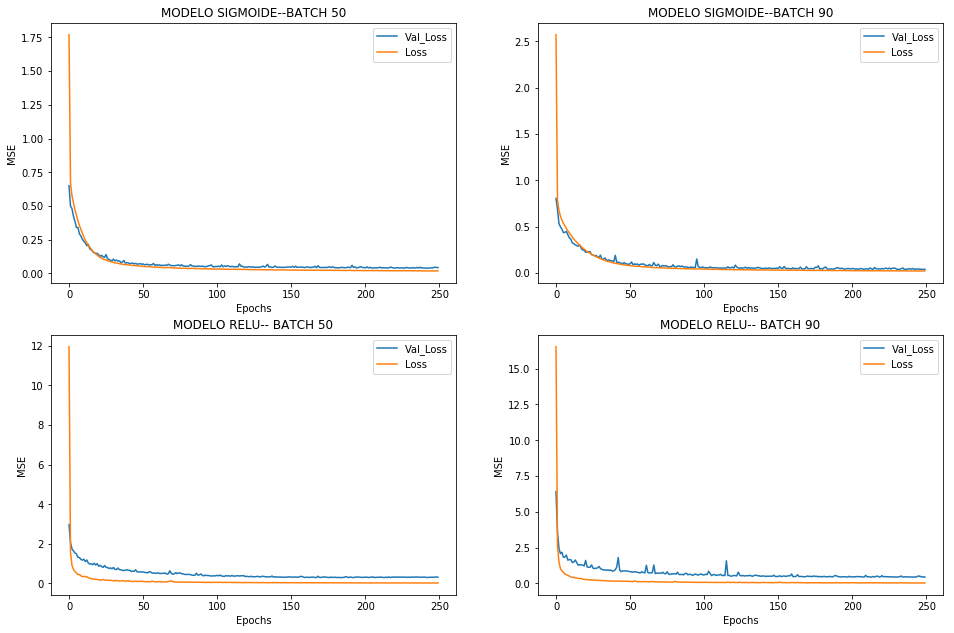

In [8]:
plt.figure(2,figsize=(16,22))
plt.subplot(4, 2, 1)
plt.plot(history_batch10_sig.history['val_loss'])
plt.plot(history_batch10_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--BATCH 50')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 2)
plt.plot(history_batch90_sig.history['val_loss'])
plt.plot(history_batch90_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--BATCH 90')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 3)
plt.plot(history_batch50_rel.history['val_loss'])
plt.plot(history_batch50_rel.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU-- BATCH 50')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 4)
plt.plot(history_batch90_rel.history['val_loss'])
plt.plot(history_batch90_rel.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU-- BATCH 90')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify> En la primera fila observamos los modelos <b>SIGMOIDAL </b>con dos valores diferentes de Batch, acá observamos que en el instante que aumentamos el tamaño, inmediatamente se aumenta el error en las primeras iteraciones y cuando converge tienen un error un poco parecido, en la función de pérdida de validación se observa una mayor estabilidad con un tamaño de Batch de 50, aunque no es tan significativa. En la segunda fila con el modelo <b>ReLU</b>, se observa el mismo comportamiento pero hay un poco más de distorsión en la señal cuando se aumenta el número de batch, asi como el valor nominar de la función de pérdida en la validación, esto no quiere decir que aumentar el número de batch sea una mala herramienta, lo que se puede decir es que en este caso preciso no sería una buena estrategia aumentar el número de batch para tener resultados deseados. </div>

<div class=text-justify><b> g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de validación? </b></div>

In [102]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_ada_sig = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adadelta(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_adadel_sig = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = RMSprop(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_rms_sig= model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adam(lr=0.01)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_adam_sig = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 216us/step - loss: 8.5725 - val_loss: 2.9723
Epoch 2/250
9745/9745 [==============================] - 2s 170us/step - loss: 1.4417 - val_loss: 1.2223
Epoch 3/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.6949 - val_loss: 0.6360
Epoch 4/250
9745/9745 [==============================] - 2s 183us/step - loss: 0.4088 - val_loss: 0.4251
Epoch 5/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.2919 - val_loss: 0.3017
Epoch 6/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.2273 - val_loss: 0.2549
Epoch 7/250
9745/9745 [==============================] - 2s 167us/step - loss: 0.1907 - val_loss: 0.2106
Epoch 8/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.1645 - val_loss: 0.1843
Epoch 9/250
9745/9745 [==============================] - 2s 163us/step - loss: 0.1458 - val_loss: 0.1683
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 170us/step - loss: 0.0385 - val_loss: 0.0712
Epoch 79/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.0383 - val_loss: 0.0713
Epoch 80/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.0381 - val_loss: 0.0708
Epoch 81/250
9745/9745 [==============================] - 2s 159us/step - loss: 0.0377 - val_loss: 0.0709
Epoch 82/250
9745/9745 [==============================] - 2s 165us/step - loss: 0.0376 - val_loss: 0.0708
Epoch 83/250
9745/9745 [==============================] - 2s 159us/step - loss: 0.0374 - val_loss: 0.0717
Epoch 84/250
9745/9745 [==============================] - 2s 158us/step - loss: 0.0372 - val_loss: 0.0708
Epoch 85/250
9745/9745 [==============================] - 2s 159us/step - loss: 0.0369 - val_loss: 0.0704
Epoch 86/250
9745/9745 [==============================] - 2s 157us/step - loss: 0.0366 - val_loss: 0.0704
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.0271 - val_loss: 0.0629
Epoch 156/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.0270 - val_loss: 0.0623
Epoch 157/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.0269 - val_loss: 0.0626
Epoch 158/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.0267 - val_loss: 0.0624
Epoch 159/250
9745/9745 [==============================] - 2s 220us/step - loss: 0.0268 - val_loss: 0.0625
Epoch 160/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.0266 - val_loss: 0.0630
Epoch 161/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.0266 - val_loss: 0.0624
Epoch 162/250
9745/9745 [==============================] - 2s 191us/step - loss: 0.0265 - val_loss: 0.0620
Epoch 163/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.0264 - val_loss: 0.0618
Epoch 164/250
9745/9745 [============

9745/9745 [==============================] - 2s 241us/step - loss: 0.3713 - val_loss: 0.3674
Epoch 58/250
9745/9745 [==============================] - 2s 242us/step - loss: 0.3634 - val_loss: 0.3570
Epoch 59/250
9745/9745 [==============================] - 2s 229us/step - loss: 0.3559 - val_loss: 0.3490
Epoch 60/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.3487 - val_loss: 0.3399
Epoch 61/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.3421 - val_loss: 0.3339
Epoch 62/250
9745/9745 [==============================] - 2s 228us/step - loss: 0.3357 - val_loss: 0.3260
Epoch 63/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.3292 - val_loss: 0.3189
Epoch 64/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.3230 - val_loss: 0.3139
Epoch 65/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.3171 - val_loss: 0.3067
Epoch 66/250
9745/9745 [==============================] - 2

9745/9745 [==============================] - 2s 224us/step - loss: 0.1073 - val_loss: 0.1148
Epoch 210/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.1070 - val_loss: 0.1144
Epoch 211/250
9745/9745 [==============================] - 2s 226us/step - loss: 0.1065 - val_loss: 0.1143
Epoch 212/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.1060 - val_loss: 0.1133
Epoch 213/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.1056 - val_loss: 0.1141
Epoch 214/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.1053 - val_loss: 0.1137
Epoch 215/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.1049 - val_loss: 0.1130
Epoch 216/250
9745/9745 [==============================] - 2s 223us/step - loss: 0.1044 - val_loss: 0.1124
Epoch 217/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.1040 - val_loss: 0.1120
Epoch 218/250
9745/9745 [==========================

9745/9745 [==============================] - 2s 185us/step - loss: 0.2698 - val_loss: 0.2361
Epoch 113/250
9745/9745 [==============================] - 2s 194us/step - loss: 0.2697 - val_loss: 0.2645
Epoch 114/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.2668 - val_loss: 0.2666
Epoch 115/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.2529 - val_loss: 0.1884
Epoch 116/250
9745/9745 [==============================] - 2s 187us/step - loss: 0.2499 - val_loss: 0.5544
Epoch 117/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.2486 - val_loss: 0.1480
Epoch 118/250
9745/9745 [==============================] - 2s 182us/step - loss: 0.2614 - val_loss: 0.1898
Epoch 119/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.2673 - val_loss: 0.1598
Epoch 120/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.2526 - val_loss: 0.8266
Epoch 121/250
9745/9745 [==========================

9745/9745 [==============================] - 2s 199us/step - loss: 0.1625 - val_loss: 0.2531
Epoch 15/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.1875 - val_loss: 0.2039
Epoch 16/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.1947 - val_loss: 0.1882
Epoch 17/250
9745/9745 [==============================] - 2s 219us/step - loss: 0.2051 - val_loss: 0.2298
Epoch 18/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.2108 - val_loss: 0.2618
Epoch 19/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.2477 - val_loss: 0.2382
Epoch 20/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.2494 - val_loss: 0.3001
Epoch 21/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.2515 - val_loss: 0.2446
Epoch 22/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.2414 - val_loss: 0.2612
Epoch 23/250
9745/9745 [==============================] - 2

9745/9745 [==============================] - 2s 206us/step - loss: 0.1321 - val_loss: 0.1493
Epoch 168/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.1352 - val_loss: 0.1393
Epoch 169/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1292 - val_loss: 0.1305
Epoch 170/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.1314 - val_loss: 0.1653
Epoch 171/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.1413 - val_loss: 0.1505
Epoch 172/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1359 - val_loss: 0.1685
Epoch 173/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1267 - val_loss: 0.2042
Epoch 174/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.1647 - val_loss: 0.1970
Epoch 175/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.1535 - val_loss: 0.1426
Epoch 176/250
9745/9745 [==========================

Text(0.5, 0, 'Epochs')

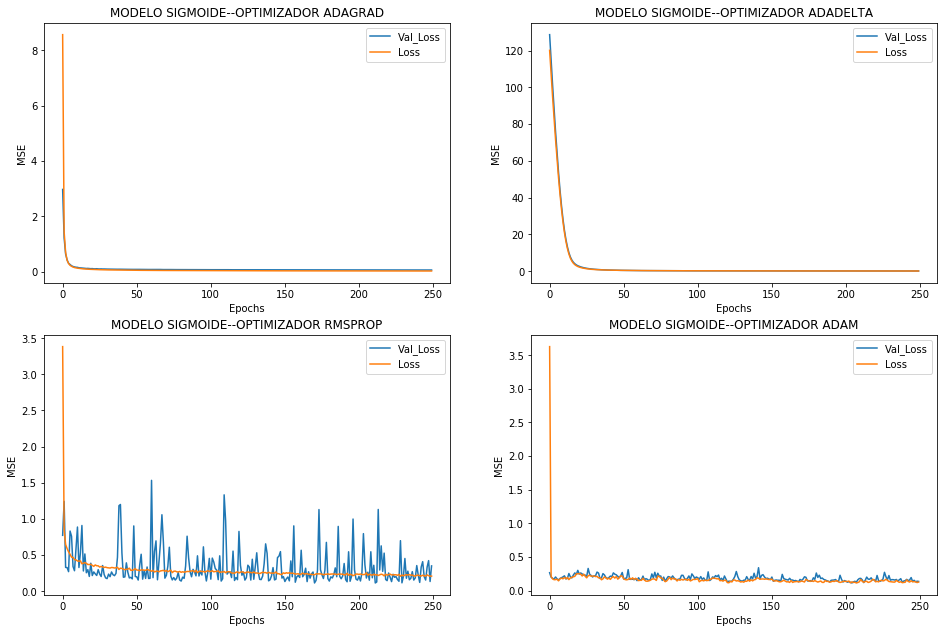

In [110]:
plt.figure(2,figsize=(16,22))
plt.subplot(4, 2, 1)
plt.plot(history_ada_sig.history['val_loss'])
plt.plot(history_ada_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--OPTIMIZADOR ADAGRAD')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 2)
plt.plot(history_adadel_sig.history['val_loss'])
plt.plot(history_adadel_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--OPTIMIZADOR ADADELTA')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 3)
plt.plot(history_rms_sig.history['val_loss'])
plt.plot(history_rms_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--OPTIMIZADOR RMSPROP')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 4)
plt.plot(history_adam_sig.history['val_loss'])
plt.plot(history_adam_sig.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE--OPTIMIZADOR ADAM')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>En esta primera sección podemos observar que la rapidez en la que converge el optimizador <b><font color=red>ADAM</b></font> es bastante superior a todos los demas, mientras que el <b><font color=green>RMSprop</b></font> demostró ser el más lento de todos los optimizadores, así como el que tiene la mayor cantidad de error en la función de pérdida de la validación de la red neuronal, esto es muy interesante y se puede analizar de muchos sentidos, en el caso particular de este set de datos el optimizador <b><font color=blue>ADAGRAD</b></font> es el que tiene el mejor comportamiento de todos los modelos entrenados hasta el momento, con un tiempo de convergencia muy pequeño y sobre todo lo mas interesante es que los valores de las funciones de pérdida en ambos set de datos es la misma, esta ubicado muy cercano a cero.</div>

In [111]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adagrad(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_ada_rel = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adadelta(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_adadel_rel = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = RMSprop(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_rms_rel= model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
moptimizer = Adam(lr=0.001)
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_adam_rel = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 225us/step - loss: 21.7325 - val_loss: 11.9543
Epoch 2/250
9745/9745 [==============================] - 2s 180us/step - loss: 6.6375 - val_loss: 7.0482
Epoch 3/250
9745/9745 [==============================] - 2s 172us/step - loss: 4.0506 - val_loss: 5.3121
Epoch 4/250
9745/9745 [==============================] - 2s 172us/step - loss: 2.8521 - val_loss: 4.1632
Epoch 5/250
9745/9745 [==============================] - 2s 171us/step - loss: 2.1783 - val_loss: 3.5836
Epoch 6/250
9745/9745 [==============================] - 2s 178us/step - loss: 1.8232 - val_loss: 3.0609
Epoch 7/250
9745/9745 [==============================] - 2s 180us/step - loss: 1.5271 - val_loss: 2.8148
Epoch 8/250
9745/9745 [==============================] - 2s 175us/step - loss: 1.3405 - val_loss: 2.5149
Epoch 9/250
9745/9745 [==============================] - 2s 187us/step - loss: 1.1948 - val_loss: 2.3889
Epoch

9745/9745 [==============================] - 2s 162us/step - loss: 0.1750 - val_loss: 0.8128
Epoch 154/250
9745/9745 [==============================] - 2s 168us/step - loss: 0.1738 - val_loss: 0.8197
Epoch 155/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1738 - val_loss: 0.7991
Epoch 156/250
9745/9745 [==============================] - 2s 160us/step - loss: 0.1727 - val_loss: 0.8023
Epoch 157/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1723 - val_loss: 0.8086
Epoch 158/250
9745/9745 [==============================] - 2s 161us/step - loss: 0.1708 - val_loss: 0.7934
Epoch 159/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.1706 - val_loss: 0.7914
Epoch 160/250
9745/9745 [==============================] - 2s 164us/step - loss: 0.1701 - val_loss: 0.7933
Epoch 161/250
9745/9745 [==============================] - 2s 167us/step - loss: 0.1693 - val_loss: 0.7938
Epoch 162/250
9745/9745 [==========================

Epoch 55/250
9745/9745 [==============================] - 2s 217us/step - loss: 7.6951 - val_loss: 10.6172
Epoch 56/250
9745/9745 [==============================] - 2s 219us/step - loss: 7.5954 - val_loss: 10.4991
Epoch 57/250
9745/9745 [==============================] - 2s 214us/step - loss: 7.4895 - val_loss: 10.3772
Epoch 58/250
9745/9745 [==============================] - 2s 216us/step - loss: 7.3915 - val_loss: 10.2592
Epoch 59/250
9745/9745 [==============================] - 2s 229us/step - loss: 7.2943 - val_loss: 10.1396
Epoch 60/250
9745/9745 [==============================] - 2s 239us/step - loss: 7.1964 - val_loss: 10.0247
Epoch 61/250
9745/9745 [==============================] - 2s 243us/step - loss: 7.0993 - val_loss: 9.9101
Epoch 62/250
9745/9745 [==============================] - 2s 242us/step - loss: 7.0076 - val_loss: 9.8038
Epoch 63/250
9745/9745 [==============================] - 2s 245us/step - loss: 6.9201 - val_loss: 9.6933
Epoch 64/250
9745/9745 [================

Epoch 132/250
9745/9745 [==============================] - 2s 217us/step - loss: 3.2014 - val_loss: 5.2499
Epoch 133/250
9745/9745 [==============================] - 2s 214us/step - loss: 3.1792 - val_loss: 5.2180
Epoch 134/250
9745/9745 [==============================] - 2s 216us/step - loss: 3.1545 - val_loss: 5.1872
Epoch 135/250
9745/9745 [==============================] - 2s 216us/step - loss: 3.1292 - val_loss: 5.1563
Epoch 136/250
9745/9745 [==============================] - 2s 225us/step - loss: 3.1078 - val_loss: 5.1259
Epoch 137/250
9745/9745 [==============================] - 2s 216us/step - loss: 3.0831 - val_loss: 5.0933
Epoch 138/250
9745/9745 [==============================] - 2s 216us/step - loss: 3.0592 - val_loss: 5.0677
Epoch 139/250
9745/9745 [==============================] - 2s 215us/step - loss: 3.0382 - val_loss: 5.0382
Epoch 140/250
9745/9745 [==============================] - 2s 214us/step - loss: 3.0169 - val_loss: 5.0128
Epoch 141/250
9745/9745 [============

9745/9745 [==============================] - 2s 172us/step - loss: 0.3859 - val_loss: 1.1935
Epoch 35/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.3648 - val_loss: 1.2480
Epoch 36/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.3852 - val_loss: 0.9573
Epoch 37/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.3876 - val_loss: 1.1452
Epoch 38/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.3409 - val_loss: 1.0205
Epoch 39/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.3519 - val_loss: 1.0490
Epoch 40/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.3042 - val_loss: 1.1505
Epoch 41/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.3339 - val_loss: 1.2293
Epoch 42/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.3291 - val_loss: 1.4122
Epoch 43/250
9745/9745 [==============================] - 2

9745/9745 [==============================] - 2s 173us/step - loss: 0.1295 - val_loss: 1.7746
Epoch 188/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.1701 - val_loss: 1.4096
Epoch 189/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.1775 - val_loss: 1.0262
Epoch 190/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1614 - val_loss: 1.6549
Epoch 191/250
9745/9745 [==============================] - 2s 175us/step - loss: 0.1320 - val_loss: 1.3549
Epoch 192/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.1465 - val_loss: 1.3815
Epoch 193/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.1392 - val_loss: 1.5566
Epoch 194/250
9745/9745 [==============================] - 2s 181us/step - loss: 0.1325 - val_loss: 1.1002
Epoch 195/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.1755 - val_loss: 1.8433
Epoch 196/250
9745/9745 [==========================

9745/9745 [==============================] - 2s 197us/step - loss: 0.0694 - val_loss: 0.7210
Epoch 91/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.1063 - val_loss: 0.5485
Epoch 92/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.0439 - val_loss: 0.5564
Epoch 93/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.0444 - val_loss: 0.5697
Epoch 94/250
9745/9745 [==============================] - 2s 198us/step - loss: 0.0649 - val_loss: 0.5382
Epoch 95/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.0633 - val_loss: 0.5702
Epoch 96/250
9745/9745 [==============================] - 2s 196us/step - loss: 0.0694 - val_loss: 0.5999
Epoch 97/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.1139 - val_loss: 0.6229
Epoch 98/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.1061 - val_loss: 0.8358
Epoch 99/250
9745/9745 [==============================] - 2

Epoch 167/250
9745/9745 [==============================] - 2s 229us/step - loss: 0.0456 - val_loss: 0.5881
Epoch 168/250
9745/9745 [==============================] - 2s 256us/step - loss: 0.0340 - val_loss: 0.6545
Epoch 169/250
9745/9745 [==============================] - 2s 219us/step - loss: 0.0386 - val_loss: 0.6270
Epoch 170/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.0424 - val_loss: 0.6843
Epoch 171/250
9745/9745 [==============================] - 2s 230us/step - loss: 0.0460 - val_loss: 0.6340
Epoch 172/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.0530 - val_loss: 0.6331
Epoch 173/250
9745/9745 [==============================] - 2s 235us/step - loss: 0.0379 - val_loss: 0.5725
Epoch 174/250
9745/9745 [==============================] - 2s 235us/step - loss: 0.0364 - val_loss: 0.5955
Epoch 175/250
9745/9745 [==============================] - 2s 229us/step - loss: 0.0339 - val_loss: 0.6515
Epoch 176/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

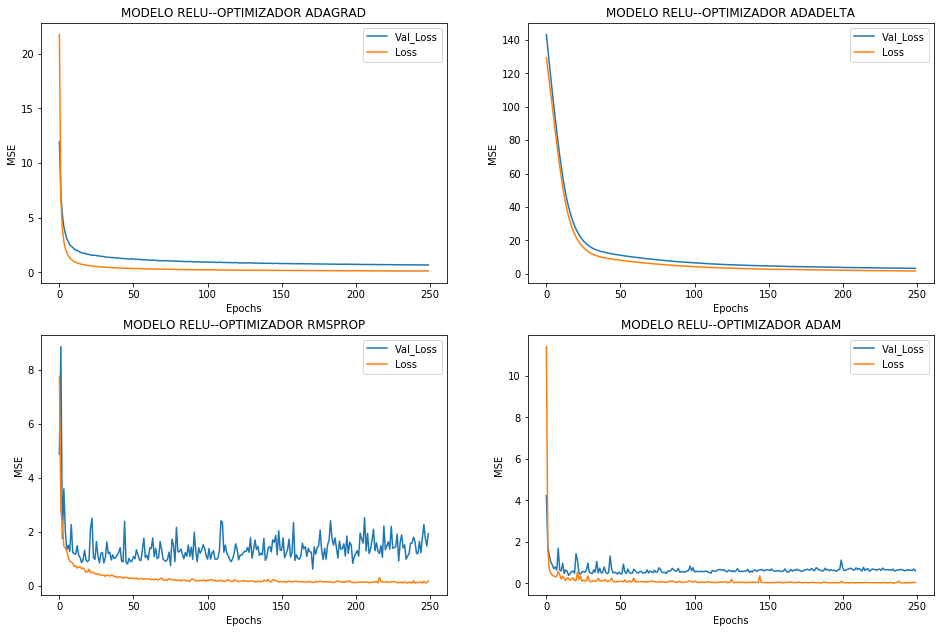

<div class=text-justify> Lo interesante de este análisis es que nos mantenemos en que la función de activación <b>ReLU</b> en particular para esta aplicación no tiene un buen rendimiento, comparado con su contraparte <b><font color=ORGANGE>SIGMOIDE</font></b> , pero en el caso de analizar datos, encontramos que al igual que en el punto anterior el modelo con el optimizador que converge mas rápido en su función de pérdida es <b><font color=RED> ADAM</font></b> pero no con la misma exactitud tenemos en el modelo <b><font color=green> ADAGRAD </B></FONT>. Aunque esta información es bastante relevante e interesante, no quiere decir que aunque en el set de validación los valores de la función sean tan dispersos, es muy claro anotar que estos resultados son solo orientados a este dataframe, puede que en otro tipo de datos este optimizador en conjunto con esta función de activación sea una mejor herramienta </div>

<div class=text-justify><b>h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.</div>

In [8]:
model = Sequential()
moptimizer = Adagrad(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_sig__onelayer = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.001)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_rel_onelayer  = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_sig_twolayers = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.001)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_rel_twolayers = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 266us/step - loss: 10.7442 - val_loss: 2.6123
Epoch 2/250
9745/9745 [==============================] - 2s 239us/step - loss: 1.5728 - val_loss: 0.9905
Epoch 3/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.8965 - val_loss: 0.8798
Epoch 4/250
9745/9745 [==============================] - 2s 230us/step - loss: 0.7306 - val_loss: 0.6105
Epoch 5/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.6406 - val_loss: 0.5557
Epoch 6/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.5886 - val_loss: 0.5209
Epoch 7/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.5522 - val_loss: 0.5417
Epoch 8/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.5248 - val_loss: 0.4704
Epoch 9/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.5217 - val_loss: 0.4960
Epoch 

Epoch 78/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3751 - val_loss: 0.3576
Epoch 79/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.3731 - val_loss: 0.3641
Epoch 80/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.3734 - val_loss: 0.3581
Epoch 81/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.3713 - val_loss: 0.3520
Epoch 82/250
9745/9745 [==============================] - 2s 197us/step - loss: 0.3689 - val_loss: 0.3591
Epoch 83/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.3674 - val_loss: 0.3757
Epoch 84/250
9745/9745 [==============================] - 2s 199us/step - loss: 0.3670 - val_loss: 0.3595
Epoch 85/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.3661 - val_loss: 0.3456
Epoch 86/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3645 - val_loss: 0.3446
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.2993 - val_loss: 0.2918
Epoch 156/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.2989 - val_loss: 0.2914
Epoch 157/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.2983 - val_loss: 0.2911
Epoch 158/250
9745/9745 [==============================] - 2s 230us/step - loss: 0.2973 - val_loss: 0.3061
Epoch 159/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.2961 - val_loss: 0.2990
Epoch 160/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.2962 - val_loss: 0.2882
Epoch 161/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.2933 - val_loss: 0.2861
Epoch 162/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.2944 - val_loss: 0.2878
Epoch 163/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.2931 - val_loss: 0.3420
Epoch 164/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 232us/step - loss: 23.4915 - val_loss: 13.3718
Epoch 2/250
9745/9745 [==============================] - 2s 199us/step - loss: 8.5414 - val_loss: 9.4643
Epoch 3/250
9745/9745 [==============================] - 2s 216us/step - loss: 6.4614 - val_loss: 7.8406
Epoch 4/250
9745/9745 [==============================] - 2s 202us/step - loss: 5.5020 - val_loss: 6.8379
Epoch 5/250
9745/9745 [==============================] - 2s 204us/step - loss: 4.9177 - val_loss: 6.4764
Epoch 6/250
9745/9745 [==============================] - 2s 201us/step - loss: 4.5140 - val_loss: 5.9966
Epoch 7/250
9745/9745 [==============================] - 2s 201us/step - loss: 4.2716 - val_loss: 5.6868
Epoch 8/250
9745/9745 [==============================] - 2s 204us/step - loss: 4.0849 - val_loss: 5.4471
Epoch 9/250
9745/9745 [==============================] - 2s 200us/step - loss: 3.9224 - val_loss: 5.2494
Epoch

Epoch 78/250
9745/9745 [==============================] - 2s 208us/step - loss: 2.0912 - val_loss: 3.1049
Epoch 79/250
9745/9745 [==============================] - 2s 197us/step - loss: 2.0820 - val_loss: 3.0943
Epoch 80/250
9745/9745 [==============================] - 2s 210us/step - loss: 2.0720 - val_loss: 3.0925
Epoch 81/250
9745/9745 [==============================] - 2s 212us/step - loss: 2.0628 - val_loss: 3.0881
Epoch 82/250
9745/9745 [==============================] - 2s 194us/step - loss: 2.0535 - val_loss: 3.0762
Epoch 83/250
9745/9745 [==============================] - 2s 202us/step - loss: 2.0452 - val_loss: 3.0568
Epoch 84/250
9745/9745 [==============================] - 2s 194us/step - loss: 2.0353 - val_loss: 3.0391
Epoch 85/250
9745/9745 [==============================] - 2s 200us/step - loss: 2.0266 - val_loss: 3.0367
Epoch 86/250
9745/9745 [==============================] - 2s 197us/step - loss: 2.0179 - val_loss: 2.9981
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 198us/step - loss: 1.5793 - val_loss: 2.4700
Epoch 156/250
9745/9745 [==============================] - 2s 235us/step - loss: 1.5746 - val_loss: 2.4460
Epoch 157/250
9745/9745 [==============================] - 2s 196us/step - loss: 1.5703 - val_loss: 2.4626
Epoch 158/250
9745/9745 [==============================] - 2s 204us/step - loss: 1.5656 - val_loss: 2.4424
Epoch 159/250
9745/9745 [==============================] - 2s 197us/step - loss: 1.5603 - val_loss: 2.4452
Epoch 160/250
9745/9745 [==============================] - 2s 203us/step - loss: 1.5556 - val_loss: 2.4526
Epoch 161/250
9745/9745 [==============================] - 2s 222us/step - loss: 1.5513 - val_loss: 2.4398
Epoch 162/250
9745/9745 [==============================] - 2s 198us/step - loss: 1.5475 - val_loss: 2.4344
Epoch 163/250
9745/9745 [==============================] - 2s 204us/step - loss: 1.5428 - val_loss: 2.4140
Epoch 164/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 253us/step - loss: 9.9792 - val_loss: 2.4663
Epoch 2/250
9745/9745 [==============================] - 2s 222us/step - loss: 1.4250 - val_loss: 1.0146
Epoch 3/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.8931 - val_loss: 0.7154
Epoch 4/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.7192 - val_loss: 0.6388
Epoch 5/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.6443 - val_loss: 0.5627
Epoch 6/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.6036 - val_loss: 0.6489
Epoch 7/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.5797 - val_loss: 0.5313
Epoch 8/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.5577 - val_loss: 0.5074
Epoch 9/250
9745/9745 [==============================] - 2s 218us/step - loss: 0.5386 - val_loss: 0.5105
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 206us/step - loss: 0.4208 - val_loss: 0.4038
Epoch 79/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.4206 - val_loss: 0.4179
Epoch 80/250
9745/9745 [==============================] - 2s 201us/step - loss: 0.4182 - val_loss: 0.4179
Epoch 81/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.4195 - val_loss: 0.4174
Epoch 82/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.4160 - val_loss: 0.3956
Epoch 83/250
9745/9745 [==============================] - 2s 222us/step - loss: 0.4172 - val_loss: 0.4019
Epoch 84/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.4161 - val_loss: 0.3940
Epoch 85/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.4131 - val_loss: 0.3970
Epoch 86/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.4136 - val_loss: 0.3931
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.3569 - val_loss: 0.3471
Epoch 156/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.3583 - val_loss: 0.3486
Epoch 157/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.3553 - val_loss: 0.4348
Epoch 158/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.3569 - val_loss: 0.3956
Epoch 159/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.3561 - val_loss: 0.3462
Epoch 160/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.3549 - val_loss: 0.3515
Epoch 161/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.3547 - val_loss: 0.3442
Epoch 162/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.3538 - val_loss: 0.3571
Epoch 163/250
9745/9745 [==============================] - 2s 224us/step - loss: 0.3525 - val_loss: 0.3652
Epoch 164/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 249us/step - loss: 24.1071 - val_loss: 13.6260
Epoch 2/250
9745/9745 [==============================] - 2s 238us/step - loss: 8.8864 - val_loss: 9.5876
Epoch 3/250
9745/9745 [==============================] - 2s 224us/step - loss: 6.6222 - val_loss: 8.0696
Epoch 4/250
9745/9745 [==============================] - 2s 219us/step - loss: 5.5868 - val_loss: 7.0441
Epoch 5/250
9745/9745 [==============================] - 2s 219us/step - loss: 5.0130 - val_loss: 6.6796
Epoch 6/250
9745/9745 [==============================] - 2s 219us/step - loss: 4.6722 - val_loss: 6.1403
Epoch 7/250
9745/9745 [==============================] - 2s 237us/step - loss: 4.4052 - val_loss: 5.8868
Epoch 8/250
9745/9745 [==============================] - 2s 214us/step - loss: 4.2230 - val_loss: 5.6459
Epoch 9/250
9745/9745 [==============================] - 2s 218us/step - loss: 4.0484 - val_loss: 5.4915
Epoch

Epoch 154/250
9745/9745 [==============================] - 2s 202us/step - loss: 1.7263 - val_loss: 2.6443
Epoch 155/250
9745/9745 [==============================] - 2s 207us/step - loss: 1.7223 - val_loss: 2.6443
Epoch 156/250
9745/9745 [==============================] - 2s 204us/step - loss: 1.7172 - val_loss: 2.6400
Epoch 157/250
9745/9745 [==============================] - 2s 207us/step - loss: 1.7121 - val_loss: 2.6489
Epoch 158/250
9745/9745 [==============================] - 2s 206us/step - loss: 1.7075 - val_loss: 2.6356
Epoch 159/250
9745/9745 [==============================] - 2s 203us/step - loss: 1.7024 - val_loss: 2.6199
Epoch 160/250
9745/9745 [==============================] - 2s 208us/step - loss: 1.6978 - val_loss: 2.6143
Epoch 161/250
9745/9745 [==============================] - 2s 203us/step - loss: 1.6933 - val_loss: 2.5878
Epoch 162/250
9745/9745 [==============================] - 2s 206us/step - loss: 1.6888 - val_loss: 2.6119
Epoch 163/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

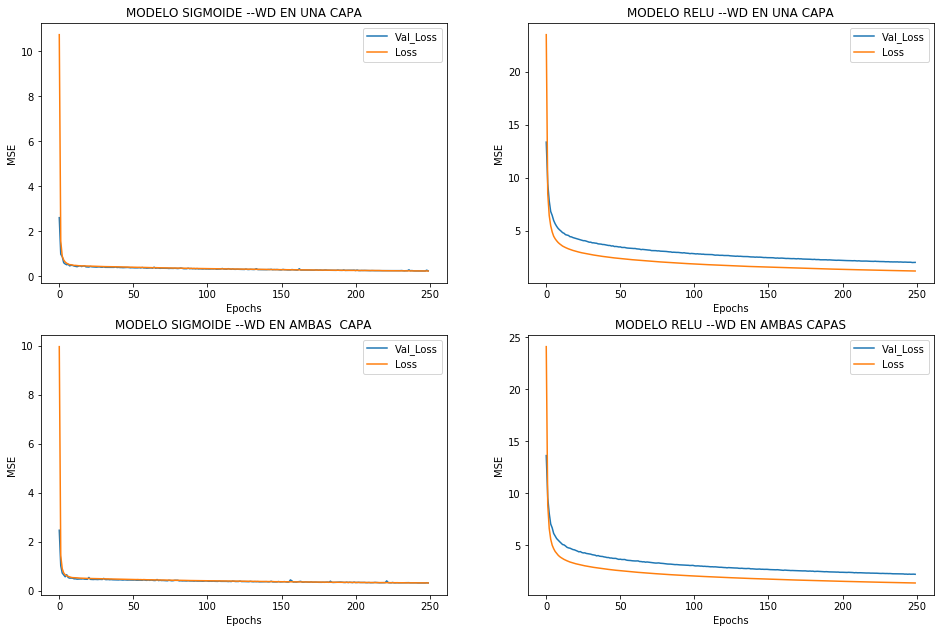

In [9]:
plt.figure(2,figsize=(16,22))
plt.subplot(4, 2, 1)
plt.plot(history_wd_sig__onelayer.history['val_loss'])
plt.plot(history_wd_sig__onelayer.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE --WD EN UNA CAPA')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 2)
plt.plot(history_wd_rel_onelayer.history['val_loss'])
plt.plot(history_wd_rel_onelayer.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU --WD EN UNA CAPA')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 3)
plt.plot(history_wd_sig_twolayers.history['val_loss'])
plt.plot(history_wd_sig_twolayers.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE --WD EN AMBAS  CAPA')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 4)
plt.plot(history_wd_rel_twolayers.history['val_loss'])
plt.plot(history_wd_rel_twolayers.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU --WD EN AMBAS CAPAS')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify>Como en las otras pruebas de sensibilidad en la primera fila se evalua el rendimiento de los modelos con el decaimiento de los pesos en una sola capa, y en la segunda fila aplicando el mismo criterio en las dos capas, es interesante encontrar que el comportamiento de ambos modelos se mantiene, con un error alto el modelo que utiliza <b>ReLU</b> como función de activación, sin encontrrar muchas diferencias en ambos gráficos en el caso del modelo Sigmoide, pero si con un aumento del error en  <b>ReLU</b>  con el decaimiento de los pesos en ambas capas, esto puede deberse a que la función introduce cierto nivel de Sparcidad que da como consecuencia problemas en el algoritmo de aprendizaje. Es muy resaltable los resultados obtenidos por el modelo <b>SIGMOIDE</b> con un error muy cercano a 0, y con una velocidad muy rapida de convergencia a su punto mínimo.</div>

In [10]:
model = Sequential()
moptimizer = Adagrad(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history1_wd_sig__onelayer = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.001)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history1_wd_rel_onelayer  = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history1_wd_sig_twolayers = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.001)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.05)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history1_wd_rel_twolayers = model.fit(X_train_scaled,y_train,batch_size=50,epochs=250,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 257us/step - loss: 9.5370 - val_loss: 1.0684
Epoch 2/250
9745/9745 [==============================] - 2s 210us/step - loss: 1.0818 - val_loss: 0.8742
Epoch 3/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.9037 - val_loss: 0.7195
Epoch 4/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.8826 - val_loss: 0.8142
Epoch 5/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.8536 - val_loss: 0.7219
Epoch 6/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.8099 - val_loss: 0.7834
Epoch 7/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.8313 - val_loss: 0.7274
Epoch 8/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.8110 - val_loss: 0.7399
Epoch 9/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.7998 - val_loss: 0.6773
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.5867 - val_loss: 0.5076
Epoch 79/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.5824 - val_loss: 0.5189
Epoch 80/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.5857 - val_loss: 0.5219
Epoch 81/250
9745/9745 [==============================] - 2s 214us/step - loss: 0.5786 - val_loss: 0.5045
Epoch 82/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.5763 - val_loss: 0.5206
Epoch 83/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.5787 - val_loss: 0.5085
Epoch 84/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.5726 - val_loss: 0.5274
Epoch 85/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.5715 - val_loss: 0.5043
Epoch 86/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.5682 - val_loss: 0.4928
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.4574 - val_loss: 0.4046
Epoch 156/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.4579 - val_loss: 0.4319
Epoch 157/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.4549 - val_loss: 0.4172
Epoch 158/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.4530 - val_loss: 0.4183
Epoch 159/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.4492 - val_loss: 0.4119
Epoch 160/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.4490 - val_loss: 0.4175
Epoch 161/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.4526 - val_loss: 0.4335
Epoch 162/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.4490 - val_loss: 0.4308
Epoch 163/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.4511 - val_loss: 0.4252
Epoch 164/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 241us/step - loss: 35.3036 - val_loss: 24.8727
Epoch 2/250
9745/9745 [==============================] - 2s 203us/step - loss: 19.2924 - val_loss: 20.1134
Epoch 3/250
9745/9745 [==============================] - 2s 206us/step - loss: 16.5405 - val_loss: 17.7455
Epoch 4/250
9745/9745 [==============================] - 2s 206us/step - loss: 14.9724 - val_loss: 16.1421
Epoch 5/250
9745/9745 [==============================] - 2s 203us/step - loss: 13.8785 - val_loss: 15.2110
Epoch 6/250
9745/9745 [==============================] - 2s 207us/step - loss: 13.0258 - val_loss: 14.4242
Epoch 7/250
9745/9745 [==============================] - 2s 201us/step - loss: 12.4048 - val_loss: 13.8043
Epoch 8/250
9745/9745 [==============================] - 2s 207us/step - loss: 11.8469 - val_loss: 13.2045
Epoch 9/250
9745/9745 [==============================] - 2s 204us/step - loss: 11.4141 - val_los

Epoch 154/250
9745/9745 [==============================] - 2s 204us/step - loss: 2.2937 - val_loss: 3.1510
Epoch 155/250
9745/9745 [==============================] - 2s 208us/step - loss: 2.2817 - val_loss: 3.1382
Epoch 156/250
9745/9745 [==============================] - 2s 204us/step - loss: 2.2683 - val_loss: 3.1198
Epoch 157/250
9745/9745 [==============================] - 2s 208us/step - loss: 2.2539 - val_loss: 3.1140
Epoch 158/250
9745/9745 [==============================] - 2s 207us/step - loss: 2.2411 - val_loss: 3.0853
Epoch 159/250
9745/9745 [==============================] - 2s 202us/step - loss: 2.2276 - val_loss: 3.0817
Epoch 160/250
9745/9745 [==============================] - 2s 208us/step - loss: 2.2143 - val_loss: 3.0606
Epoch 161/250
9745/9745 [==============================] - 2s 203us/step - loss: 2.2025 - val_loss: 3.0527
Epoch 162/250
9745/9745 [==============================] - 2s 209us/step - loss: 2.1889 - val_loss: 3.0415
Epoch 163/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 250us/step - loss: 9.5316 - val_loss: 1.8863
Epoch 2/250
9745/9745 [==============================] - 2s 206us/step - loss: 1.1003 - val_loss: 0.9206
Epoch 3/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.9618 - val_loss: 0.7570
Epoch 4/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.8960 - val_loss: 0.7385
Epoch 5/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.8834 - val_loss: 0.8243
Epoch 6/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.8664 - val_loss: 0.8053
Epoch 7/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.8497 - val_loss: 0.7216
Epoch 8/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.8452 - val_loss: 0.7159
Epoch 9/250
9745/9745 [==============================] - 2s 221us/step - loss: 0.8402 - val_loss: 0.7239
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.6741 - val_loss: 0.6061
Epoch 79/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.6723 - val_loss: 0.6037
Epoch 80/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.6680 - val_loss: 0.6562
Epoch 81/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.6703 - val_loss: 0.5979
Epoch 82/250
9745/9745 [==============================] - 2s 203us/step - loss: 0.6680 - val_loss: 0.5925
Epoch 83/250
9745/9745 [==============================] - 2s 210us/step - loss: 0.6648 - val_loss: 0.5913
Epoch 84/250
9745/9745 [==============================] - 2s 202us/step - loss: 0.6620 - val_loss: 0.5854
Epoch 85/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.6618 - val_loss: 0.5948
Epoch 86/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.6567 - val_loss: 0.5908
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 305us/step - loss: 0.5525 - val_loss: 0.5091
Epoch 156/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.5513 - val_loss: 0.4898
Epoch 157/250
9745/9745 [==============================] - 2s 212us/step - loss: 0.5467 - val_loss: 0.4909
Epoch 158/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.5472 - val_loss: 0.4919
Epoch 159/250
9745/9745 [==============================] - 2s 209us/step - loss: 0.5440 - val_loss: 0.5036
Epoch 160/250
9745/9745 [==============================] - 2s 205us/step - loss: 0.5453 - val_loss: 0.4895
Epoch 161/250
9745/9745 [==============================] - 2s 211us/step - loss: 0.5412 - val_loss: 0.4914
Epoch 162/250
9745/9745 [==============================] - 2s 208us/step - loss: 0.5419 - val_loss: 0.5067
Epoch 163/250
9745/9745 [==============================] - 2s 204us/step - loss: 0.5420 - val_loss: 0.4926
Epoch 164/250
9745/9745 [============

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 213us/step - loss: 18.0627 - val_loss: 10.2438
Epoch 2/250
9745/9745 [==============================] - 2s 171us/step - loss: 5.3309 - val_loss: 6.6956
Epoch 3/250
9745/9745 [==============================] - 2s 178us/step - loss: 3.4932 - val_loss: 5.1249
Epoch 4/250
9745/9745 [==============================] - 2s 174us/step - loss: 2.5713 - val_loss: 4.1289
Epoch 5/250
9745/9745 [==============================] - 2s 177us/step - loss: 2.0525 - val_loss: 3.5048
Epoch 6/250
9745/9745 [==============================] - 2s 172us/step - loss: 1.6839 - val_loss: 3.2481
Epoch 7/250
9745/9745 [==============================] - 2s 178us/step - loss: 1.4795 - val_loss: 2.8086
Epoch 8/250
9745/9745 [==============================] - 2s 171us/step - loss: 1.2795 - val_loss: 2.6050
Epoch 9/250
9745/9745 [==============================] - 2s 177us/step - loss: 1.1457 - val_loss: 2.4203
Epoch

Epoch 78/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.2480 - val_loss: 0.9892
Epoch 79/250
9745/9745 [==============================] - 2s 174us/step - loss: 0.2454 - val_loss: 0.9816
Epoch 80/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.2432 - val_loss: 0.9790
Epoch 81/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.2414 - val_loss: 0.9840
Epoch 82/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.2396 - val_loss: 0.9782
Epoch 83/250
9745/9745 [==============================] - 2s 169us/step - loss: 0.2371 - val_loss: 0.9692
Epoch 84/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.2354 - val_loss: 0.9655
Epoch 85/250
9745/9745 [==============================] - 2s 173us/step - loss: 0.2337 - val_loss: 0.9640
Epoch 86/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.2315 - val_loss: 0.9570
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.1532 - val_loss: 0.7681
Epoch 156/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.1519 - val_loss: 0.7724
Epoch 157/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.1514 - val_loss: 0.7624
Epoch 158/250
9745/9745 [==============================] - 2s 176us/step - loss: 0.1509 - val_loss: 0.7672
Epoch 159/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.1503 - val_loss: 0.7609
Epoch 160/250
9745/9745 [==============================] - 2s 177us/step - loss: 0.1494 - val_loss: 0.7694
Epoch 161/250
9745/9745 [==============================] - 2s 171us/step - loss: 0.1490 - val_loss: 0.7633
Epoch 162/250
9745/9745 [==============================] - 2s 179us/step - loss: 0.1482 - val_loss: 0.7573
Epoch 163/250
9745/9745 [==============================] - 2s 172us/step - loss: 0.1474 - val_loss: 0.7473
Epoch 164/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

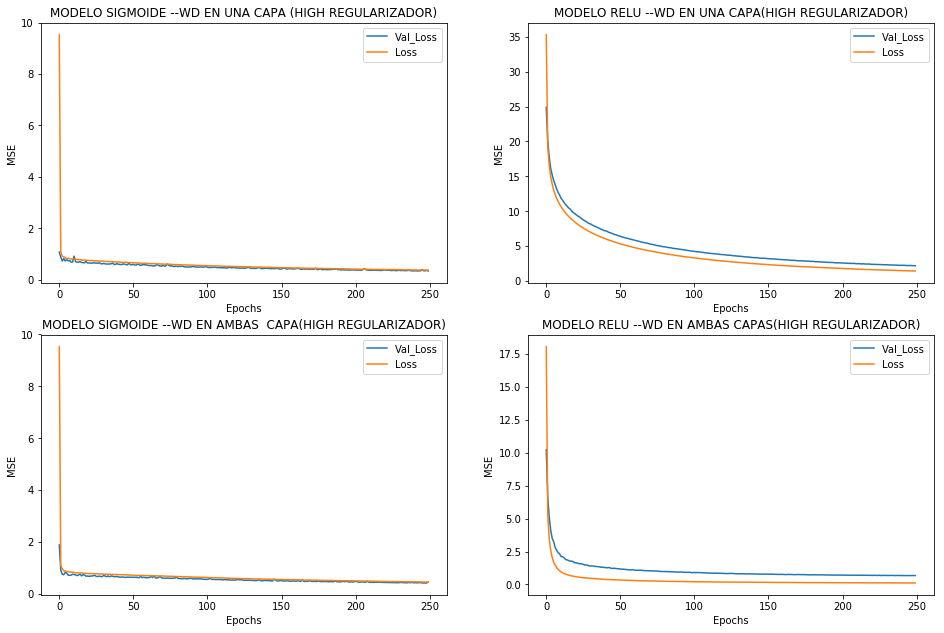

In [11]:
plt.figure(2,figsize=(16,22))
plt.subplot(4, 2, 1)
plt.plot(history1_wd_sig__onelayer.history['val_loss'])
plt.plot(history1_wd_sig__onelayer.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE --WD EN UNA CAPA (HIGH REGULARIZADOR)')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 2)
plt.plot(history1_wd_rel_onelayer.history['val_loss'])
plt.plot(history1_wd_rel_onelayer.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU --WD EN UNA CAPA(HIGH REGULARIZADOR)')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 3)
plt.plot(history1_wd_sig_twolayers.history['val_loss'])
plt.plot(history1_wd_sig_twolayers.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE --WD EN AMBAS  CAPA(HIGH REGULARIZADOR)')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 4)
plt.plot(history1_wd_rel_twolayers.history['val_loss'])
plt.plot(history1_wd_rel_twolayers.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU --WD EN AMBAS CAPAS(HIGH REGULARIZADOR)')
plt.ylabel('MSE')
plt.xlabel('Epochs')


<div class=justify>La regularización tiene un efecto muy interesante, comparando con los modelos anteriores tanto en ReLu como en <b>SIGMOIDE</b> que es como los diferenciamos y es en la eliminación de los rizados en las salidas ademas que en el caso de <b>ReLU</b> que en todos los demas modelos tenia un error muy elevado en este caso con el WD en ambas capas y con un nivel alto se llegan a resultados parecidos utilizando la función de activación <b>SIGMOIDE</b>; mientras que la red que tiene esta función de activación tiene un resultado muy bueno, de lejos es el mejor obtenido actualmente por la velocidad en la que ambas funciones alcanzaro la convergencia, asi como tiene en magnitud el valor más bajo que se ha analizado hasta el momento.</div>

In [6]:
model = Sequential()
moptimizer = Adagrad(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_sig__onelayer = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.001)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_rel_onelayer  = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.01)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_sig_twolayers = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,validation_data=(X_val_scaled, y_val))
model = Sequential()
moptimizer = Adagrad(lr=0.001)
idim=X_train_scaled.shape[1]
model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l1(0.01)))
model.add(Activation('linear'))
model.compile(optimizer=moptimizer,loss='mean_squared_error')
history_wd_rel_twolayers = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,validation_data=(X_val_scaled, y_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


Train on 9745 samples, validate on 4060 samples
Epoch 1/100
9745/9745 [==============================] - 3s 331us/step - loss: 15.7186 - val_loss: 3.3686
Epoch 2/100
9745/9745 [==============================] - 3s 267us/step - loss: 3.7052 - val_loss: 3.7717
Epoch 3/100
9745/9745 [==============================] - 2s 252us/step - loss: 3.4797 - val_loss: 3.0334
Epoch 4/100
9745/9745 [==============================] - 2s 253us/step - loss: 3.3328 - val_loss: 3.3597
Epoch 5/100
9745/9745 [==============================] - 3s 260us/step - loss: 3.2186 - val_loss: 2.9703
Epoch 6/100
9745/9745 [==============================] - 2s 255us/step - loss: 3.1084 - val_loss: 3.2027
Epoch 7/100
9745/9745 [==============================] - 3s 263us/step - loss: 3.0046 - val_loss: 3.0888
Epoch 8/100
9745/9745 [==============================] - 3s 278us/step - loss: 2.9226 - val_loss: 2.7248
Epoch 9/100
9745/9745 [==============================] - 3s 260us/step - loss: 2.8418 - val_loss: 2.6400
Epoch 

Epoch 78/100
9745/9745 [==============================] - 3s 265us/step - loss: 1.4982 - val_loss: 1.3969
Epoch 79/100
9745/9745 [==============================] - 3s 268us/step - loss: 1.5019 - val_loss: 1.4084
Epoch 80/100
9745/9745 [==============================] - 3s 270us/step - loss: 1.4755 - val_loss: 1.4318
Epoch 81/100
9745/9745 [==============================] - 3s 276us/step - loss: 1.4908 - val_loss: 1.4114
Epoch 82/100
9745/9745 [==============================] - 2s 248us/step - loss: 1.4828 - val_loss: 1.4044
Epoch 83/100
9745/9745 [==============================] - 2s 256us/step - loss: 1.4883 - val_loss: 1.8607
Epoch 84/100
9745/9745 [==============================] - 3s 257us/step - loss: 1.4624 - val_loss: 1.3304
Epoch 85/100
9745/9745 [==============================] - 2s 250us/step - loss: 1.5001 - val_loss: 1.3349
Epoch 86/100
9745/9745 [==============================] - 2s 247us/step - loss: 1.4727 - val_loss: 1.3707
Epoch 87/100
9745/9745 [======================

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


Train on 9745 samples, validate on 4060 samples
Epoch 1/100
9745/9745 [==============================] - 3s 312us/step - loss: 92.3194 - val_loss: 78.2685
Epoch 2/100
9745/9745 [==============================] - 3s 276us/step - loss: 69.3892 - val_loss: 67.3158
Epoch 3/100
9745/9745 [==============================] - 3s 263us/step - loss: 61.1734 - val_loss: 60.4017
Epoch 4/100
9745/9745 [==============================] - 3s 279us/step - loss: 55.5191 - val_loss: 55.6106
Epoch 5/100
9745/9745 [==============================] - 3s 278us/step - loss: 51.3461 - val_loss: 51.4298
Epoch 6/100
9745/9745 [==============================] - 3s 281us/step - loss: 47.9636 - val_loss: 48.3564
Epoch 7/100
9745/9745 [==============================] - 3s 276us/step - loss: 45.1881 - val_loss: 45.6663
Epoch 8/100
9745/9745 [==============================] - 3s 267us/step - loss: 42.8233 - val_loss: 43.4273
Epoch 9/100
9745/9745 [==============================] - 3s 260us/step - loss: 40.7905 - val_los

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 9745 samples, validate on 4060 samples
Epoch 1/100
9745/9745 [==============================] - 3s 315us/step - loss: 16.3924 - val_loss: 3.7437
Epoch 2/100
9745/9745 [==============================] - 3s 282us/step - loss: 3.9118 - val_loss: 3.8600
Epoch 3/100
9745/9745 [==============================] - 3s 281us/step - loss: 3.6382 - val_loss: 3.4456
Epoch 4/100
9745/9745 [==============================] - 2s 254us/step - loss: 3.5287 - val_loss: 3.3447
Epoch 5/100
9745/9745 [==============================] - 3s 262us/step - loss: 3.4290 - val_loss: 3.0948
Epoch 6/100
9745/9745 [==============================] - 3s 264us/step - loss: 3.2840 - val_loss: 2.9586
Epoch 7/100
9745/9745 [==============================] - 3s 261us/step - loss: 3.1929 - val_loss: 2.9817
Epoch 8/100
9745/9745 [==============================] - 2s 248us/step - loss: 3.1324 - val_loss: 2.9246
Epoch 9/100
9745/9745 [==============================] - 3s 263us/step - loss: 3.0582 - val_loss: 2.8038
Epoch 

Epoch 78/100
9745/9745 [==============================] - 2s 248us/step - loss: 1.7438 - val_loss: 1.6463
Epoch 79/100
9745/9745 [==============================] - 2s 253us/step - loss: 1.7434 - val_loss: 1.7479
Epoch 80/100
9745/9745 [==============================] - 3s 260us/step - loss: 1.7397 - val_loss: 1.6290
Epoch 81/100
9745/9745 [==============================] - 2s 256us/step - loss: 1.7263 - val_loss: 1.6239
Epoch 82/100
9745/9745 [==============================] - 2s 243us/step - loss: 1.7165 - val_loss: 1.6276
Epoch 83/100
9745/9745 [==============================] - 2s 253us/step - loss: 1.7305 - val_loss: 1.6443
Epoch 84/100
9745/9745 [==============================] - 2s 251us/step - loss: 1.7083 - val_loss: 1.6104
Epoch 85/100
9745/9745 [==============================] - 2s 252us/step - loss: 1.7055 - val_loss: 1.6183
Epoch 86/100
9745/9745 [==============================] - 2s 246us/step - loss: 1.6992 - val_loss: 1.6822
Epoch 87/100
9745/9745 [======================

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`


Train on 9745 samples, validate on 4060 samples
Epoch 1/100
9745/9745 [==============================] - 3s 297us/step - loss: 97.3437 - val_loss: 81.6344
Epoch 2/100
9745/9745 [==============================] - 2s 248us/step - loss: 72.5553 - val_loss: 69.9574
Epoch 3/100
9745/9745 [==============================] - 3s 257us/step - loss: 63.9645 - val_loss: 62.9624
Epoch 4/100
9745/9745 [==============================] - 3s 262us/step - loss: 58.0349 - val_loss: 57.5738
Epoch 5/100
9745/9745 [==============================] - 2s 252us/step - loss: 53.6492 - val_loss: 53.3339
Epoch 6/100
9745/9745 [==============================] - 2s 251us/step - loss: 50.0635 - val_loss: 50.0735
Epoch 7/100
9745/9745 [==============================] - 3s 262us/step - loss: 47.1019 - val_loss: 47.2733
Epoch 8/100
9745/9745 [==============================] - 2s 255us/step - loss: 44.5414 - val_loss: 44.8446
Epoch 9/100
9745/9745 [==============================] - 2s 249us/step - loss: 42.2886 - val_los

Text(0.5, 0, 'Epochs')

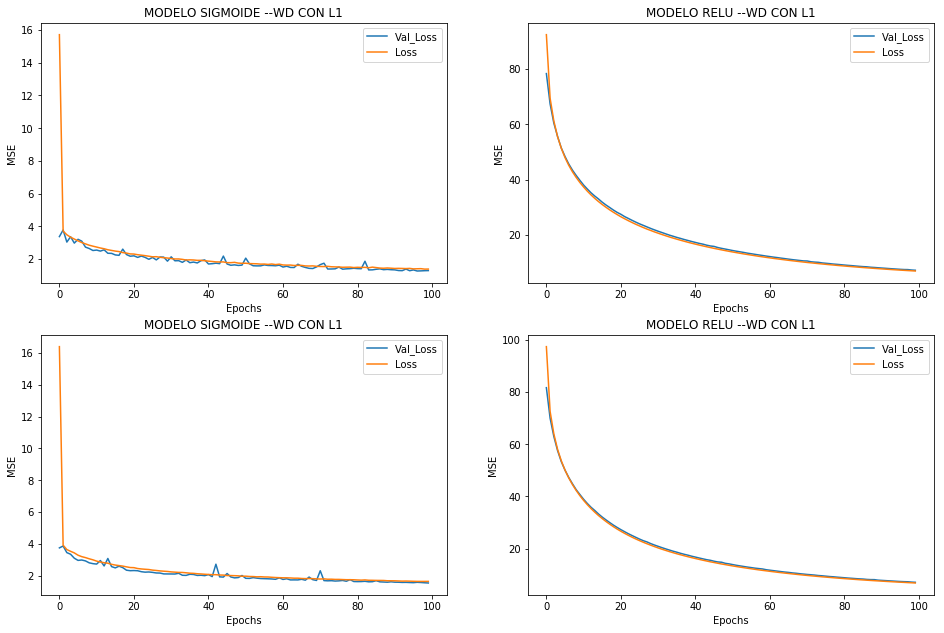

In [7]:
plt.figure(2,figsize=(16,22))
plt.subplot(4, 2, 1)
plt.plot(history_wd_sig__onelayer.history['val_loss'])
plt.plot(history_wd_sig__onelayer.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE --WD CON L1')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 2)
plt.plot(history_wd_rel_onelayer.history['val_loss'])
plt.plot(history_wd_rel_onelayer.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU --WD CON L1')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 3)
plt.plot(history_wd_sig_twolayers.history['val_loss'])
plt.plot(history_wd_sig_twolayers.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDE --WD CON L1')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(4, 2, 4)
plt.plot(history_wd_rel_twolayers.history['val_loss'])
plt.plot(history_wd_rel_twolayers.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU --WD CON L1')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<div class=text-justify><b>i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.</b></div>

In [31]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history_dp_sigm_20 = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history_dp_sigm_40 = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 361us/step - loss: 1.7155 - val_loss: 0.5985
Epoch 2/250
9745/9745 [==============================] - 3s 285us/step - loss: 0.8339 - val_loss: 0.5620
Epoch 3/250
9745/9745 [==============================] - 3s 282us/step - loss: 0.7556 - val_loss: 0.4303
Epoch 4/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.7130 - val_loss: 0.4222
Epoch 5/250
9745/9745 [==============================] - 3s 275us/step - loss: 0.6696 - val_loss: 0.6594
Epoch 6/250
9745/9745 [==============================] - 3s 270us/step - loss: 0.6320 - val_loss: 0.4761
Epoch 7/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.6059 - val_loss: 0.3568
Epoch 8/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.5756 - val_loss: 0.3466
Epoch 9/250
9745/9745 [==============================] - 3s 268us/step - loss: 0.5633 - val_loss: 0.3292
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.3173 - val_loss: 0.1619
Epoch 79/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.3171 - val_loss: 0.1752
Epoch 80/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.3089 - val_loss: 0.1741
Epoch 81/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.3027 - val_loss: 0.1825
Epoch 82/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.3143 - val_loss: 0.3495
Epoch 83/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.3126 - val_loss: 0.1909
Epoch 84/250
9745/9745 [==============================] - 2s 244us/step - loss: 0.3157 - val_loss: 0.1641
Epoch 85/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.3114 - val_loss: 0.1612
Epoch 86/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.3109 - val_loss: 0.1635
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 3s 276us/step - loss: 0.2695 - val_loss: 0.1491
Epoch 156/250
9745/9745 [==============================] - 3s 291us/step - loss: 0.2693 - val_loss: 0.1743
Epoch 157/250
9745/9745 [==============================] - 3s 260us/step - loss: 0.2698 - val_loss: 0.2004
Epoch 158/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2653 - val_loss: 0.1455
Epoch 159/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2693 - val_loss: 0.1790
Epoch 160/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.2769 - val_loss: 0.1424
Epoch 161/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.2714 - val_loss: 0.1547
Epoch 162/250
9745/9745 [==============================] - 2s 241us/step - loss: 0.2641 - val_loss: 0.2640
Epoch 163/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.2683 - val_loss: 0.1672
Epoch 164/250
9745/9745 [============

Epoch 58/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5239 - val_loss: 0.2884
Epoch 59/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.5116 - val_loss: 0.2419
Epoch 60/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.5080 - val_loss: 0.2473
Epoch 61/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.5143 - val_loss: 0.2590
Epoch 62/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.5083 - val_loss: 0.2754
Epoch 63/250
9745/9745 [==============================] - 2s 251us/step - loss: 0.5130 - val_loss: 0.2452
Epoch 64/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.5239 - val_loss: 0.2582
Epoch 65/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.5085 - val_loss: 0.2356
Epoch 66/250
9745/9745 [==============================] - 3s 259us/step - loss: 0.5042 - val_loss: 0.2568
Epoch 67/250
9745/9745 [======================

Epoch 135/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.4490 - val_loss: 0.2683
Epoch 136/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.4458 - val_loss: 0.2487
Epoch 137/250
9745/9745 [==============================] - 3s 282us/step - loss: 0.4557 - val_loss: 0.2081
Epoch 138/250
9745/9745 [==============================] - 4s 369us/step - loss: 0.4527 - val_loss: 0.2288
Epoch 139/250
9745/9745 [==============================] - 4s 373us/step - loss: 0.4545 - val_loss: 0.2069
Epoch 140/250
9745/9745 [==============================] - 3s 329us/step - loss: 0.4476 - val_loss: 0.2113
Epoch 141/250
9745/9745 [==============================] - 3s 297us/step - loss: 0.4519 - val_loss: 0.2065
Epoch 142/250
9745/9745 [==============================] - 3s 265us/step - loss: 0.4529 - val_loss: 0.2288
Epoch 143/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.4647 - val_loss: 0.2092
Epoch 144/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

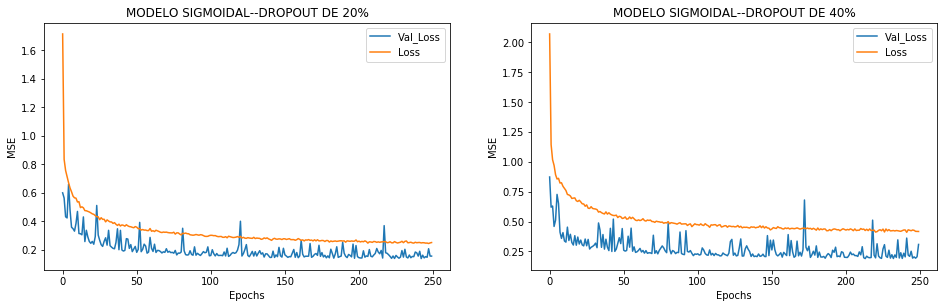

In [38]:
plt.figure(2,figsize=(16,10))
plt.subplot(2, 2, 1)
plt.plot(history_dp_sigm_20.history['val_loss'])
plt.plot(history_dp_sigm_20.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDAL--DROPOUT DE 20%')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(2, 2, 2)
plt.plot(history_dp_sigm_40.history['val_loss'])
plt.plot(history_dp_sigm_40.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO SIGMOIDAL--DROPOUT DE 40%')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<IMG SRC="1.PNG" WIDTH=640 HEIGHT=480 BORDER=0 ALT="Un beb&eacute;" ALIGN="CENTER"> 

<div class=justify>En este caso hemos importado la respuesta grande del modelo original B que es tan comumente llamado en todo el ejercicio para poder compararlo con los resultados del Dropout de <font color=red><b>20%</font> </b>y de <font color=red><b>40%</font></b>, en este caso es importante señal que como primera medida tenemos un error en la data de validación inferior que en la función de perdida dde entrenamiento, aunque con unos comportamiento un poco inestables, pero es en el primer modelo que ocurre este comportamiento en todo momento, además que la magnitud del error es bastante pequeña, tambien podemos analizar que el mejor comportamiento se encuentra con un Dropout de<font color=red><b> 20%</font> </b>, en el de <font color=red><b>40%</font> </b> los márgenes de error se elevan un  poco, aunque es una cantidad despreciable con los porcentajes de error que se tienen modificando otro tipo de parámetros</div>

In [33]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history_dp_relu_20 = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history_dp_relu_40 = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 342us/step - loss: 1.6283 - val_loss: 0.6995
Epoch 2/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.8254 - val_loss: 0.5177
Epoch 3/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.7462 - val_loss: 0.4809
Epoch 4/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.6928 - val_loss: 1.4124
Epoch 5/250
9745/9745 [==============================] - 2s 255us/step - loss: 0.6388 - val_loss: 0.3823
Epoch 6/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.6279 - val_loss: 0.3480
Epoch 7/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.5888 - val_loss: 0.4046
Epoch 8/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.5792 - val_loss: 0.3681
Epoch 9/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.5649 - val_loss: 0.3332
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.3080 - val_loss: 0.1639
Epoch 79/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.3118 - val_loss: 0.1616
Epoch 80/250
9745/9745 [==============================] - 2s 249us/step - loss: 0.3161 - val_loss: 0.2173
Epoch 81/250
9745/9745 [==============================] - 2s 242us/step - loss: 0.3078 - val_loss: 0.1848
Epoch 82/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2986 - val_loss: 0.1980
Epoch 83/250
9745/9745 [==============================] - 2s 251us/step - loss: 0.3115 - val_loss: 0.2931
Epoch 84/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.3072 - val_loss: 0.1760
Epoch 85/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.3137 - val_loss: 0.2776
Epoch 86/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.3157 - val_loss: 0.1690
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2666 - val_loss: 0.1605
Epoch 156/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.2715 - val_loss: 0.1706
Epoch 157/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2740 - val_loss: 0.2209
Epoch 158/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.2650 - val_loss: 0.1512
Epoch 159/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2691 - val_loss: 0.1887
Epoch 160/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.2693 - val_loss: 0.1504
Epoch 161/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.2658 - val_loss: 0.1521
Epoch 162/250
9745/9745 [==============================] - 2s 251us/step - loss: 0.2695 - val_loss: 0.2058
Epoch 163/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.2710 - val_loss: 0.1570
Epoch 164/250
9745/9745 [============

Epoch 58/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.5279 - val_loss: 0.2569
Epoch 59/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.5245 - val_loss: 0.3453
Epoch 60/250
9745/9745 [==============================] - 2s 255us/step - loss: 0.5183 - val_loss: 0.2411
Epoch 61/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.5115 - val_loss: 0.3244
Epoch 62/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.5178 - val_loss: 0.2365
Epoch 63/250
9745/9745 [==============================] - 2s 255us/step - loss: 0.5068 - val_loss: 0.3762
Epoch 64/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.5204 - val_loss: 0.2450
Epoch 65/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.5151 - val_loss: 0.2376
Epoch 66/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.5120 - val_loss: 0.2834
Epoch 67/250
9745/9745 [======================

Epoch 135/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.4499 - val_loss: 0.2261
Epoch 136/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.4403 - val_loss: 0.2501
Epoch 137/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.4523 - val_loss: 0.2099
Epoch 138/250
9745/9745 [==============================] - 2s 253us/step - loss: 0.4462 - val_loss: 0.2293
Epoch 139/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.4488 - val_loss: 0.2066
Epoch 140/250
9745/9745 [==============================] - 2s 245us/step - loss: 0.4442 - val_loss: 0.2079
Epoch 141/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.4565 - val_loss: 0.2481
Epoch 142/250
9745/9745 [==============================] - 2s 251us/step - loss: 0.4550 - val_loss: 0.2809
Epoch 143/250
9745/9745 [==============================] - 2s 250us/step - loss: 0.4568 - val_loss: 0.2190
Epoch 144/250
9745/9745 [============

Text(0.5, 0, 'Epochs')

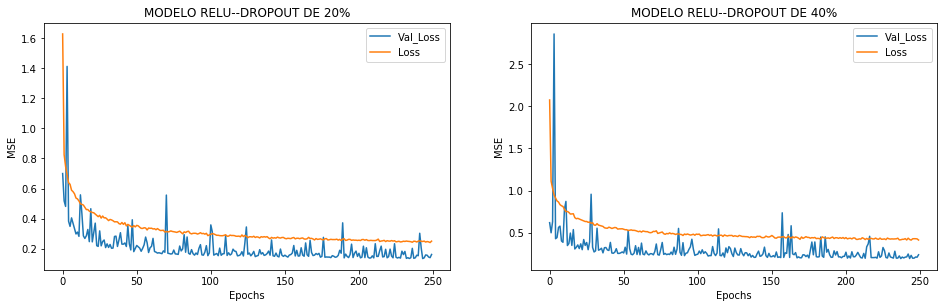

In [36]:
plt.figure(2,figsize=(16,10))
plt.subplot(2, 2, 1)
plt.plot(history_dp_relu_20.history['val_loss'])
plt.plot(history_dp_relu_20.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU--DROPOUT DE 20%')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.subplot(2, 2, 2)
plt.plot(history_dp_relu_40.history['val_loss'])
plt.plot(history_dp_relu_40.history['loss'])
plt.legend(('Val_Loss', 'Loss' ))
plt.title('MODELO RELU--DROPOUT DE 40%')
plt.ylabel('MSE')
plt.xlabel('Epochs')

<IMG SRC="2.PNG" WIDTH=640 HEIGHT=480 BORDER=0 ALT="Un beb&eacute;" ALIGN="CENTER"> 

<div class=justify>Al igual que en el caso anterior la primera mención que se debe realizar es que en magnitud de error en ambos cosas con Dropout de 20% y 40% hay un mejor resultado que el modelo original, pero si se pueden observar unos picos en la función de pérdida de validación que en unos precisos instantes de tiempo suelen ser más altos que la función de pérdida en el set de entrenamiento, se debería analizar qué tan robusto es este tipo de algoritmo, pues al tener un comportamiento sin estabilidad definida se podría entrar en momentos para los cuales el algoritmo no es capaz de generalizar correctamente ante nuevas muestras. </div>

<div class=text-justify><b> j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya. </b></div>

In [8]:
from sklearn.model_selection import train_test_split
Xm = X_train_scaled.values
ym = y_train
kf = KFold(n_splits=5)
kf.get_n_splits(Xm)
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    ...#la regularization se debe incorporar a cada capa separadamente
    moptimizer = Adadelta(lr=0.01)
    idim=X_train_scaled.shape[1]
    model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
    model.add(Activation('linear'))
    model.compile(optimizer=moptimizer,loss='mean_squared_error')
    model.fit(Xm[train], ym[train], epochs=250)
    ...# evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)






C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
  


Epoch 1/250
7796/7796 [==============================] - 3s 445us/step - loss: 126.4633
Epoch 2/250
7796/7796 [==============================] - 3s 341us/step - loss: 110.9690
Epoch 3/250
7796/7796 [==============================] - 3s 336us/step - loss: 96.2813
Epoch 4/250
7796/7796 [==============================] - 3s 338us/step - loss: 82.1478
Epoch 5/250
7796/7796 [==============================] - 3s 351us/step - loss: 68.8160
Epoch 6/250
7796/7796 [==============================] - 3s 355us/step - loss: 56.5276
Epoch 7/250
7796/7796 [==============================] - 3s 420us/step - loss: 45.4896
Epoch 8/250
7796/7796 [==============================] - 3s 351us/step - loss: 35.8840
Epoch 9/250
7796/7796 [==============================] - 3s 378us/step - loss: 27.8413
Epoch 10/250
7796/7796 [==============================] - 3s 390us/step - loss: 21.2852
Epoch 11/250
7796/7796 [==============================] - 3s 353us/step - loss: 16.0819
Epoch 12/250
7796/7796 [===============

Epoch 95/250
7796/7796 [==============================] - 3s 403us/step - loss: 0.6823
Epoch 96/250
7796/7796 [==============================] - 3s 367us/step - loss: 0.6775
Epoch 97/250
7796/7796 [==============================] - 3s 418us/step - loss: 0.6725
Epoch 98/250
7796/7796 [==============================] - 3s 391us/step - loss: 0.6687
Epoch 99/250
7796/7796 [==============================] - 3s 354us/step - loss: 0.6641
Epoch 100/250
7796/7796 [==============================] - 3s 337us/step - loss: 0.6605
Epoch 101/250
7796/7796 [==============================] - 3s 333us/step - loss: 0.6562
Epoch 102/250
7796/7796 [==============================] - 3s 363us/step - loss: 0.6524
Epoch 103/250
7796/7796 [==============================] - 3s 344us/step - loss: 0.6487
Epoch 104/250
7796/7796 [==============================] - 3s 342us/step - loss: 0.6453
Epoch 105/250
7796/7796 [==============================] - 3s 332us/step - loss: 0.6418
Epoch 106/250
7796/7796 [============

7796/7796 [==============================] - 3s 390us/step - loss: 2.5386
Epoch 30/250
7796/7796 [==============================] - 3s 391us/step - loss: 2.4164
Epoch 31/250
7796/7796 [==============================] - 3s 383us/step - loss: 2.3058
Epoch 32/250
7796/7796 [==============================] - 3s 403us/step - loss: 2.2052
Epoch 33/250
7796/7796 [==============================] - 3s 364us/step - loss: 2.1139
Epoch 34/250
7796/7796 [==============================] - 3s 336us/step - loss: 2.0278 0s - 
Epoch 35/250
7796/7796 [==============================] - 3s 337us/step - loss: 1.9539
Epoch 36/250
7796/7796 [==============================] - 3s 346us/step - loss: 1.8794
Epoch 37/250
7796/7796 [==============================] - 3s 342us/step - loss: 1.8092
Epoch 38/250
7796/7796 [==============================] - 3s 340us/step - loss: 1.7481
Epoch 39/250
7796/7796 [==============================] - 3s 352us/step - loss: 1.6923
Epoch 40/250
7796/7796 [==========================

7796/7796 [==============================] - 3s 349us/step - loss: 0.6209
Epoch 123/250
7796/7796 [==============================] - 3s 385us/step - loss: 0.6185
Epoch 124/250
7796/7796 [==============================] - 3s 368us/step - loss: 0.6168
Epoch 125/250
7796/7796 [==============================] - 3s 350us/step - loss: 0.6145
Epoch 126/250
7796/7796 [==============================] - 3s 342us/step - loss: 0.6123
Epoch 127/250
7796/7796 [==============================] - 3s 358us/step - loss: 0.6109
Epoch 128/250
7796/7796 [==============================] - 3s 364us/step - loss: 0.6090
Epoch 129/250
7796/7796 [==============================] - 3s 366us/step - loss: 0.6069
Epoch 130/250
7796/7796 [==============================] - 3s 352us/step - loss: 0.6055
Epoch 131/250
7796/7796 [==============================] - 3s 338us/step - loss: 0.6037
Epoch 132/250
7796/7796 [==============================] - 3s 370us/step - loss: 0.6022
Epoch 133/250
7796/7796 [=====================

Epoch 57/250
7796/7796 [==============================] - 3s 334us/step - loss: 0.8964
Epoch 58/250
7796/7796 [==============================] - 3s 340us/step - loss: 0.8806
Epoch 59/250
7796/7796 [==============================] - 3s 350us/step - loss: 0.8657
Epoch 60/250
7796/7796 [==============================] - 3s 329us/step - loss: 0.8513
Epoch 61/250
7796/7796 [==============================] - 3s 334us/step - loss: 0.8378
Epoch 62/250
7796/7796 [==============================] - 3s 347us/step - loss: 0.8241
Epoch 63/250
7796/7796 [==============================] - 3s 335us/step - loss: 0.8117
Epoch 64/250
7796/7796 [==============================] - 3s 327us/step - loss: 0.7991
Epoch 65/250
7796/7796 [==============================] - 3s 345us/step - loss: 0.7873
Epoch 66/250
7796/7796 [==============================] - 3s 331us/step - loss: 0.7757
Epoch 67/250
7796/7796 [==============================] - 3s 329us/step - loss: 0.7653
Epoch 68/250
7796/7796 [===================

7796/7796 [==============================] - 3s 353us/step - loss: 0.4075
Epoch 243/250
7796/7796 [==============================] - 3s 340us/step - loss: 0.4073
Epoch 244/250
7796/7796 [==============================] - 3s 365us/step - loss: 0.4069
Epoch 245/250
7796/7796 [==============================] - 3s 363us/step - loss: 0.4064
Epoch 246/250
7796/7796 [==============================] - 3s 333us/step - loss: 0.4062
Epoch 247/250
7796/7796 [==============================] - 3s 342us/step - loss: 0.4058
Epoch 248/250
7796/7796 [==============================] - 3s 347us/step - loss: 0.4054
Epoch 249/250
7796/7796 [==============================] - 3s 378us/step - loss: 0.4054
Epoch 250/250
1949/1949 [==============================] - 0s 110us/step
Epoch 1/250
7796/7796 [==============================] - 3s 390us/step - loss: 143.2209
Epoch 2/250
7796/7796 [==============================] - 3s 351us/step - loss: 125.5209 0s - loss: 126
Epoch 3/250
7796/7796 [=======================

7796/7796 [==============================] - 3s 360us/step - loss: 0.7025
Epoch 86/250
7796/7796 [==============================] - 3s 334us/step - loss: 0.6960
Epoch 87/250
7796/7796 [==============================] - 3s 356us/step - loss: 0.6905
Epoch 88/250
7796/7796 [==============================] - 3s 356us/step - loss: 0.6850
Epoch 89/250
7796/7796 [==============================] - 3s 356us/step - loss: 0.6796
Epoch 90/250
7796/7796 [==============================] - 3s 348us/step - loss: 0.6741
Epoch 91/250
7796/7796 [==============================] - 3s 352us/step - loss: 0.6693
Epoch 92/250
7796/7796 [==============================] - 3s 368us/step - loss: 0.6649
Epoch 93/250
7796/7796 [==============================] - 3s 345us/step - loss: 0.6601
Epoch 94/250
7796/7796 [==============================] - 4s 453us/step - loss: 0.6554
Epoch 95/250
7796/7796 [==============================] - 3s 339us/step - loss: 0.6513
Epoch 96/250
7796/7796 [==============================] 

7796/7796 [==============================] - 3s 340us/step - loss: 0.4961
Epoch 179/250
7796/7796 [==============================] - 3s 334us/step - loss: 0.4953
Epoch 180/250
7796/7796 [==============================] - 3s 352us/step - loss: 0.4945
Epoch 181/250
7796/7796 [==============================] - 3s 351us/step - loss: 0.4936
Epoch 182/250
7796/7796 [==============================] - 3s 389us/step - loss: 0.4934
Epoch 183/250
7796/7796 [==============================] - 3s 379us/step - loss: 0.4927
Epoch 184/250
7796/7796 [==============================] - 3s 368us/step - loss: 0.4921
Epoch 185/250
7796/7796 [==============================] - 3s 372us/step - loss: 0.4913
Epoch 186/250
7796/7796 [==============================] - 3s 381us/step - loss: 0.4907
Epoch 187/250
7796/7796 [==============================] - 3s 341us/step - loss: 0.4899
Epoch 188/250
7796/7796 [==============================] - 3s 345us/step - loss: 0.4894
Epoch 189/250
7796/7796 [=====================

7796/7796 [==============================] - 3s 352us/step - loss: 0.5784
Epoch 114/250
7796/7796 [==============================] - 3s 335us/step - loss: 0.5756
Epoch 115/250
7796/7796 [==============================] - 3s 362us/step - loss: 0.5728
Epoch 116/250
7796/7796 [==============================] - 3s 338us/step - loss: 0.5708
Epoch 117/250
7796/7796 [==============================] - 3s 337us/step - loss: 0.5684
Epoch 118/250
7796/7796 [==============================] - 3s 340us/step - loss: 0.5664
Epoch 119/250
7796/7796 [==============================] - 3s 335us/step - loss: 0.5640
Epoch 120/250
7796/7796 [==============================] - 3s 341us/step - loss: 0.5620
Epoch 121/250
7796/7796 [==============================] - 3s 372us/step - loss: 0.5604
Epoch 122/250
7796/7796 [==============================] - 3s 350us/step - loss: 0.5584
Epoch 123/250
7796/7796 [==============================] - 3s 359us/step - loss: 0.5563
Epoch 124/250
7796/7796 [=====================

In [10]:
cvscores

[0.4115317242001191,
 0.3742644849069428,
 0.8357612235751625,
 0.5041005475329031,
 0.4887298948646142]

<div class=text-justify> En la parte superior obtenemos los resultados de los scores de <b>K=5</b> validaciones con sus respectivos modelos generados, es importante resaltar que en la mayoría de los modelos tuvimos un <b>Accuracy</b> promedio de 50, y en un modelo el tercero para ser mas específico tuvimos un <b>score</b> de 83, lo que nos indica que hay una buena relación de datos, pero que también hay una combinación que en el momento del entrenamiento puede ayudar mucho más para la optimización de nuestra red.
    </div>

In [ ]:
from sklearn.model_selection import train_test_split
Xm = X_train_scaled.values
ym = y_train
kf = KFold(n_splits=10)
kf.get_n_splits(Xm)
cvscores = []
for i, (train, val) in enumerate(kf.split(Xm)):
    model = Sequential()
    ...#la regularization se debe incorporar a cada capa separadamente
    moptimizer = Adadelta(lr=0.01)
    idim=X_train_scaled.shape[1]
    model.add(Dense(256,input_dim=idim,kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, kernel_initializer='uniform',W_regularizer=regularizers.l2(0.01)))
    model.add(Activation('linear'))
    model.compile(optimizer=moptimizer,loss='mean_squared_error')
    model.fit(Xm[train], ym[train], epochs=250)
    ...# evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)


